# Solutions to Tutorials Exercises

---
## Initial Value Problems

Question 1. Using a pen and calculator (i.e., not Python), solve the following IVP using the Euler method with step length $h=0.4$. Write down your solution correct to 4 decimal places

$$
y' = ty, \qquad t \in [0, 2], \qquad y(0) = 1.
$$

**Solution:**

$$
\begin{aligned}
y_0 &=1, & t_0 &= 0, \\
y_1 &= y_0 + ht_0y_0=1+0.4(0)(1) = 1, & t_1&=t_0+h=0+0.4=0.4,\\
y_2 &= y_1 + ht_1y_1 = 1 + 0.4(0.4)(1) = 1.16, & t_2&=t_1+h=0.4+0.4=0.8, \\
y_3 &= y_2 + ht_2y_2 = 1.16 + 0.4(0.8)(1.16) = 1.5312, & t_3 &=t_2 + h = 0.8 + 0.4 =1.2,\\
y_4 &= y_3 + ht_3y_3 = 1.5312 + 0.4(1.2)(1.5312) = 2.2662, & t_4 &= t_3 + h=1.2+0.4 = 1.6, \\
y_5 &= y_4 + ht_4y_4 = 2.2662 + 0.4(1.6)(2.2662) = 5.1724, & t_5 &= t_4 + h = 1.6 + 0.4 = 2.
\end{aligned}
$$


Question 2. Reproduce your solutions to question 1 using Python.

In [1]:
import numpy as np

def euler(f, tspan, y0, h):
    '''
    Calculuates the solution to an IVP using the Euler method
    '''

    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0

    # Solver loop
    for n in range(nsteps):
        y[n + 1] = y[n] + h * f(t[n], y[n])
        t[n + 1] = t[n] + h

    return t, y

In [2]:
%matplotlib inline
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Define ODE function
def f(t, y):
    return  t*y

# Define IVP parameters
tspan = [ 0, 2 ]
y0 = 1
h = 0.4

# Solve IVP using the Euler method
t, y = euler(f, tspan, y0, h)

# Output solution table
print(' t     RK2\n' + '-' * 12)
for n in range(len(t)):
    print('{:3.2f} {:7.4f}'.format(t[n], y[n]))

 t     RK2
------------
0.00  1.0000
0.40  1.0000
0.80  1.1600
1.20  1.5312
1.60  2.2662
2.00  3.7165


Question 3. The exact solution to the IVP in question 1 is $y=e^{\frac{1}{2}t^2}$. Produce a plot of the Euler solution from question 2 against the exact solution.

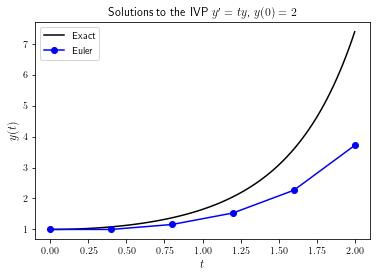

In [3]:
def exact_sol(t):
    return np.exp(0.5 * t**2)

# Plot solution
fig, ax = plt.subplots()

t1 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t1, exact_sol(t1), 'k-', label='Exact')
ax.plot(t, y, 'bo-', label='Euler')
ax.set_title("Solutions to the IVP $y'=ty$, $y(0)=2$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

---
## Runge-Kutta Methods

Question 1. Write the following Runge-Kutta method in a Butcher tableau.

$$
\begin{aligned}
    y_{n+1} &= y_n + \frac{h}{6}(k_1 + 4k_3 + k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{4}h, y_n + \tfrac{1}{4}hk_1), \\
    k_3 &= f(t_n + \tfrac{1}{2}h, y_n + \tfrac{1}{2}hk_2), \\
    k_4 &= f(t_n + h, y_n + h(k_1 - 2k_2 + 2k_3)).
\end{aligned}
$$

**Solution:**

$$\begin{array}{c|cccc}
0 & \\
\frac{1}{4} & \frac{1}{4} \\
\frac{1}{2} & 0 & \frac{1}{2} \\
1 & 1 & -2 & 2 \\ \hline
& \frac{1}{6} & 0 & \frac{2}{3} & \frac{1}{6}
\end{array}$$

Question 2. Write out the equations for the following Runge-Kutta method.

$$\begin{array}{c|cccc}
0 \\
\frac{1}{4} & \frac{1}{4} \\
\frac{1}{2} & -\frac{1}{2} & 1 \\
1 & \frac{1}{4} & 0 & \frac{3}{4} \\ \hline
& 0 & \frac{4}{9} & \frac{1}{3} & \frac{2}{9}
\end{array}$$

**Solution:**

$$ \begin{aligned}
y_{n+1} &= y_n + \frac{h}{9}(4k_2 + 3k_3 + 2k_4), \\
k_1 &= f(t_n, y_n), \\
k_2 &= f(t_n + \tfrac{1}{4}h, y_n + \tfrac{1}{4}hk_1), \\
k_3 &= f(t_n + \tfrac{1}{2}h, y_n + h(-\tfrac{1}{2}k_1 + k_2)), \\
k_4 &= f(t_n + h, y_n + h(\tfrac{1}{4}k_1 + \tfrac{3}{4}k_3)).
\end{aligned} $$

Question 3. Derive an explicit second-order Runge-Kutta method such that $b_1 = \tfrac{1}{3}$. Express your solution as a Butcher tableau.

**Solution:**

In [4]:
from sympy import *

b1, b2, c1, c2, a21 = symbols('b1, b2, c1, c2, a21')

b1 = Rational('1 / 3')

eqn1 = b1 + b2 - 1
eqn2 = c2 * b2 - Rational('1 / 2')
eqn3 = a21 * b2 - Rational('1 / 2')

solve((eqn1, eqn2, eqn3))

[{a21: 3/4, b2: 2/3, c2: 3/4}]

$$
\begin{array}{c|cc}
0 & 0 \\
\frac{3}{4} & \frac{3}{4} \\ \hline
& \frac{1}{3} & \frac{2}{3}
\end{array}
$$

Question 4. Derive an explicit fourth-order Runge-Kutta method such that $b_1=0$ and $c_2 = \tfrac{1}{5}$. Write your answer in the form of a Butcher tableau.

**Solution:**

In [5]:
# Initialise symbolic variables
b1, b2, b3, b4 = symbols('b1, b2, b3, b4')
c2, c3, c4 = symbols('c2, c3, c4')
a31, a32, a41, a42, a43 = symbols('a31, a32, a41, a42, a43')
b1, c2 = 0, Rational('1 / 5')

# Define order conditions
eqn1 = b1 + b2 + b3 + b4 - 1
eqn2 = b2 * c2 + b3 * c3 + b4 * c4 - Rational('1 / 2')
eqn3 = b2 * c2**2 + b3 * c3**2 + b4 * c4**2 - Rational('1 / 3')
eqn4 = b2 * c2**3 + b3 * c3**3 + b4 * c4**3 - Rational('1 / 4')
eqn5 = b3 * c3 * a32 * c2 + b4 * c4 * (a42 * c2 + a43 * c3) - Rational('1 / 8')
eqn6 = b3 * a32 + b4 * a42 - b2 * (1 - c2)
eqn7 = b4 * a43 - b3 * (1 - c3)
eqn8 = b4 * (1 - c4)
eqn9 = c2 - a21
eqn10 = c3 - a31 - a32
eqn11 = c4 - a41 - a42 - a43

# Solve system
solve((eqn1, eqn2, eqn3, eqn4, eqn5, eqn6, eqn7, eqn8, eqn9, eqn10, eqn11))

[{a21: 1/5,
  a31: -31/32,
  a32: 55/32,
  a41: 9,
  a42: -120/11,
  a43: 32/11,
  b2: 125/264,
  b3: 16/33,
  b4: 1/24,
  c3: 3/4,
  c4: 1}]

$$\begin{array}{c|cccc}
0 \\
\frac{1}{5} & \frac{1}{5} \\
\frac{3}{4} & -\frac{31}{32} & \frac{55}{32} \\
1 & 9 & -\frac{120}{11} & \frac{32}{11} \\ \hline
& \frac{1}{5} & \frac{125}{264} & \frac{16}{33} & \frac{1}{24}
\end{array}$$

Question 5. Using pen and a calculator and working to 4 decimal places, apply your Runge-Kutta method derived in question 3 to solve the following IVP using a step length of $h=0.4$

$$
    y' = ty, \qquad t \in [0, 2], \qquad y(0) = 1.
$$

**Solution:**

$$ \begin{aligned}
k_1 &= t_0y_0 = 0(1) = 0, \\
k_2 &= (t_0+c_2h)(y_0 + a_{12}hk_1) = \left(0 + \frac{3}{4}(0.4)\right)\left(1 + \frac{3}{4}(0.4)(0)\right) = 0.3,\\
y_1 &= y_0 + \frac{h}{3}(k_1 + 2k_2) = 1 + \frac{0.4}{3}(0 +0.3 ) = 1.08,\\
 t_1 &= t_0 + h = 0 + 0.4 = 0.4, \\
\\
k_1 &= t_1y_1 = (0.4)(1.08) = 0.432, \\
k_2 &= (t_1 + c_2h)(y_1+a_{21}hk_1) = \left( 0.4 + \frac{3}{4}(0.4)\right)\left(1.08 + \frac{3}{4}(0.4)(0.432)\right) = 0.8467, \\
y_2 &= y_1 + \frac{h}{3}(k_1 + 2k_2) = 1.08 + \frac{0.4}{3}(0.432 + 2(0.8467)) = 1.3634,\\
 t_2 &= t_1 + h = 0.4 + 0.4 = 0.8, \\
\\
k_1 &= t_2y_2 = 0.8(1.3634) = 1.0907, \\
k_2&= (t_2 + c_2h)(y_2 + a_{21}hk_1) = \left(0.8 + \frac{3}{4}(0.4)\right)\left(1.3634 + \frac{3}{4}(0.4)(1.0907)\right) = 1.8597, \\
y_3 &= y_2 + \frac{h}{3}(k_1 + 2k_2) = 1.3634 + \frac{0.4}{3}(1.0907 + 2(1.8597)) = 2.0047, \\
 t_3 &= t_2 + h = 0.8 + 0.4 = 1.2, \\
\\
k_1 &= t_3y_3 = 1.2(2.0047) = 2.4057, \\
k_2 &= (t_3 + c_2h)(y_3 + a_{21}hk_1) = \left(1.2 + \frac{3}{4}(0.4)\right)\left(2.0047 + \frac{3}{4}(0.4)(2.4057)\right) = 4.0897, \\
y_4 &= y_3 + \frac{h}{3}(k_1 + 2k_2) = 2.0047 + \frac{0.4}{3}(2.4057 + 2(4.0897)) = 3.4161, \\
 t_4 &=t_3 + h = 1.2 + 0.4 = 1.6, \\
\\
k_1 &= t_4y_4 = 1.6(3.4161), \\
k_2 &= (t_4 + c_2h)(y_4 + a_{21}hk_1) = \left(1.6 + \frac{3}{4}(0.4)\right)\left(3.4161 + \frac{3}{4}(0.4)(3.4161)\right) = 9.6060, \\
y_5 &= y_4 + \frac{h}{3}(k_1 + 2k_2) = 3.4161 + \frac{0.4}{3}(5.4647 + 2(9.6060)) = 6.7064, \\
t_5 &= t_4 + h = 1.6 + 0.4 = 2.
\end{aligned}
$$

Question 6. Repeat question 5 using the RK4 method (the RK4 method is derived in example 4). 

**Solution:**


$$ \begin{aligned}
k_1 &= t_0y_0 = 0(1) = 0, \\
k_2 &= (t_0 + c_2h)(y_0 + a_{21}hk_1) = \left(0 + \frac{1}{2}(0.4)\right)\left(1 + \frac{1}{2}(0.4)(0)\right) = 0.2, \\
k_3 &= (t_0 + c_3h)(y_0 + h(a_{31}k_1 + a_{32}k_2)) = \left(0 + \frac{1}{2}(0.4)\right)\left(1 + \frac{1}{2}(0.4)(0.2)\right)=0.2080, \\
k_4 &= (t_0 + c_4h)(y_0 + h(a_{41}k_1 + a_{42}k_2 + a_{43}k_3)) = \left(0 + 0.4)\right)\left(1 + 0.4(0.2080)\right) = 0.4333, \\
y_1 &= y_0 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) = 1 + \frac{0.4}{6}(0 + 2(0.2) + 2(0.2080) + 0.4333) = 1.0833, \\
t_1 &= t_0 + h = 0 + 0.4 = 0.4,\\
\\
k_1 &= t_1y_1 = 0.4(1.0833) = 0.4333, \\
k_2 &= (t_1 + c_2h)(y_1 + a_{21}hk_1) = \left(0.4 + \frac{1}{2}(0.4)\right)\left(1.0833 + \frac{1}{2}(0.4)(0.4333)\right) = 0.7020, \\
k_3 &= (t_1 + c_3h)(y_1 + h(a_{31}k_1 + a_{32}k_2)) = \left(0.4 + \frac{1}{2}(0.4)\right)\left(1.0833 + \frac{1}{2}(0.4)(0.7020)\right)=0.7342, \\
k_4 &= (t_1 + c_4h)(y_1 + h(a_{41}k_1 + a_{42}k_2 + a_{43}k_3)) = \left(0.4 + 0.4\right)\left(1.0833 + 0.4(0.7342)\right) = 1.1016, \\
y_2 &= y_1 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) = 1.0833 + \frac{0.4}{6}(04333 + 2(0.7020) + 2(0.7342) + 1.1016) = 1.3771, \\
t_2 &= t_1 + h = 0.4 + 0.4 = 0.8,\\
\\
k_1 &= t_2y_2 = 0.8(1.3771) = 1.1017, \\
k_2 &= (t_2 + c_2h)(y_2 + a_{21}hk_1) = \left(0.8 + \frac{1}{2}(0.4)\right)\left(1.3771 + \frac{1}{2}(0.4)(1.1017)\right) = 1.5974, \\
k_3 &= (t_2 + c_3h)(y_2 + h(a_{31}k_1 + a_{32}k_2)) = \left(0.8 + \frac{1}{2}(0.4)\right)\left(1.3771 + \frac{1}{2}(0.4)(1.5974)\right)=1.6966, \\
k_4 &= (t_2 + c_4h)(y_2 + h(a_{41}k_1 + a_{42}k_2 + a_{43}k_3)) = \left(0.8 + 0.4\right)\left(1.3771 + 0.4(1.6966)\right) = 2.4669, \\
y_3 &= y_2 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) = 1.3771 + \frac{0.4}{6}(1.1017+ 2(1.5974) + 2(1.6966) + 2.4669) = 2.0542, \\
t_3 &= t_2 + h = 0.8 + 0.4 = 1.2,\\
\\
k_1 &= t_3y_3 = 1.2(2.0542) = 2.4561, \\
k_2 &= (t_3 + c_2h)(y_3 + a_{21}hk_1) = \left(1.2 + \frac{1}{2}(0.4)\right)\left(2.0542 + \frac{1}{2}(0.4)(2.4651)\right) = 3.5661, \\
k_3 &= (t_3 + c_3h)(y_3 + h(a_{31}k_1 + a_{32}k_2)) = \left(1.2 + \frac{1}{2}(0.4)\right)\left(2.0542 + \frac{1}{2}(0.4)(3.5661)\right)=3.8744, \\
k_4 &= (t_3 + c_4h)(y_3 + h(a_{41}k_1 + a_{42}k_2 + a_{43}k_3)) = \left(1.2 + 0.4\right)\left(2.0542 + 0.4(3.8744)\right) = 5.7664, \\
y_4 &= y_3 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) = 2.0542 + \frac{0.4}{6}(2.4561 + 2(3.5661) + 2(3.8744) + 5.7664) = 3.5950, \\
t_4 &= t_3 + h = 1.2 + 0.4 = 1.6,\\
\\
k_1 &= t_4y_4 = 1.6(3.5950) = 5.7521, \\
k_2 &= (t_4 + c_2h)(y_4 + a_{21}hk_1) = \left(1.6 + \frac{1}{2}(0.4)\right)\left(3.5950 + \frac{1}{2}(0.4)(5.7521)\right) = 8.5418, \\
k_3 &= (t_4 + c_3h)(y_4 + h(a_{31}k_1 + a_{32}k_2)) = \left(1.2 + \frac{1}{2}(0.4)\right)\left(3.5950 + \frac{1}{2}(0.4)(8.5418)\right)= 9.5461, \\
k_4&= (t_4 + c_4h)(y_4 + h(a_{41}k_1 + a_{42}k_2 + a_{43}k_3)) = \left(1.2 + 0.4\right)\left(3.5950 + 0.4(9.5461)\right) = 14.8270, \\
y_5 &= y_4 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) = 3.5950 + \frac{0.4}{6}(5.7521 + 2(8.5418) + 2(9.5461) + 14.8270) = 7.3787, \\
t_5 &= t_4 + h = 1.6 + 0.4 = 2,
\end{aligned} $$

Question 7. Repeat question 5 using Python. The exact solution to this IVP is $y=e^{t^2/2}$. Produce a table comparing the numerical and exact solutions. Produce a plot of the numerical solutions and exact solution on the same set of axes.

In [6]:
def rk2(f, tspan, y0, h):
    '''
    Calculates the solution to an IVP using the second-order Runge-Kutta method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0

    # Solver loop
    for n in range(nsteps):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + 3/4 * h, y[n] + 3/4 * h * k1)
        y[n + 1] = y[n] + h * (1/3 * k1 + 2/3 * k2)
        t[n + 1] = t[n] + h

    return t, y
 

 t     RK2    Exact
--------------------
0.00  1.0000  1.0000
0.40  1.0000  1.0209
0.80  1.1600  1.1620
1.20  1.5312  1.5390
1.60  2.2662  2.2583
2.00  3.7165  3.2845


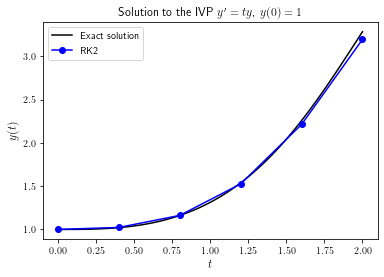

In [7]:
def f(t, y):
    return np.sin(t)**2 * y

def exact_sol(t):
    return np.exp(0.5 * (t - np.sin(t) * np.cos(t)))

# Define IVP parameters
tspan = [ 0, 2 ]
y0 = 1
h = 0.4

# Invoke the RK2 method to solve IVP
t1, y1 = rk2(f, tspan, y0, h)

# Output solution table
print(' t     RK2    Exact\n' + '-' * 20)
for n in range(len(t)):
    print('{:3.2f} {:7.4f} {:7.4f}'.format(t[n], y[n], exact_sol(t[n])))
    
# Plot solutions
fig, ax = plt.subplots()

t3 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t3, exact_sol(t3), 'k-', label='Exact solution')
ax.plot(t1, y1, 'bo-', label='RK2')

ax.set_title("Solution to the IVP $y'=ty$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

---
## Implicit Runge-Kutta Methods

Question 1. Show that the Radau IA method derived in example 3 is a third-order method.

**Solution:** The Radau IA method is

$$A = \pmatrix{0 & 0 \cr \frac{1}{3} & \frac{1}{3}}, \qquad \mathbf{b} = \pmatrix{\frac{1}{4} \cr \frac{3}{4}}, \qquad \mathbf{c} = \pmatrix{0 \cr \frac{2}{3}}.$$

Check the $B(k)$ condition

$$\begin{array}{lll}
j = 1: & LHS = b_1 + b_2 = \frac{1}{4} + \frac{3}{4} = 1, & RHS = 1, \\
j = 2 : & LHS = b_1c_1 + b_2c_2 = \frac{1}{4}(0) + \frac{3}{4}\left(\frac{2}{3}\right) = \frac{1}{2}, & RHS = \frac{1}{2}, \\
j = 3 : & LHS = b_1c_1^2 + b_2c_2^2 = \frac{1}{4}(0)^2 + \frac{3}{4}\left(\frac{2}{3}\right)^2 = \frac{1}{3}, & RHS = \frac{1}{3}, \\
j = 4 : & LHS = b_1c_1^3 + b_2c_2^3 = \frac{1}{4}(0)^2 + \frac{3}{4}\left(\frac{2}{3}\right)^3 = \frac{2}{9}, & RHS = \frac{1}{4}.
\end{array}$$

So this IRK method can be upto order $k=3$. Since $\lfloor \frac{3}{2} \rfloor=1$ check the $C(1)$ condition:

$$\begin{array}{lll}
j = 1: & LHS = a_{11} + a_{12} = 0 + 0 = 0, & RHS = c_1 = 0, \\
j = 2: & LHS = a_{21} + a_{22} = \frac{1}{3} + \frac{1}{3} = \frac{2}{3}, & RHS = \frac{2}{3}.
\end{array}$$

So the $C(1)$ condition is satisfied. Check the $D(1)$ condition

$$\begin{array}{lll}
i = 1: & LHS = a_{11}b_1 + a_{21}b_2 = 0\left(\frac{1}{4}\right)+\frac{1}{3}\left(\frac{3}{4}\right) = \frac{1}{4}, & RHS = b_1 (1 - c_1) = \frac{1}{4}(1 - 0) = \frac{1}{4}, \\
i = 2: & LHS = a_{12}b_1 + a_{22}b_2 = 0\left(\frac{1}{4}\right) + \frac{1}{3}\left(\frac{3}{4}\right) = \frac{1}{4}, & RHS= b_2(1 - c_2) = \frac{3}{4}\left(1 - \frac{2}{3}\right) = \frac{1}{4}.
\end{array}$$

Since $C(3)$, $C(1)$ and $D(1)$ conditions are satisfied then this is a third-order IRK method.


Question 2. Determine the order of the following IRK method

$$ \begin{aligned}
\begin{array}{c|ccc}
0 & 0 & 0 \\
\frac{1}{2} & \frac{1}{4} & \frac{1}{4} & 0 \\
1 & 0 & 1 & 0 \\ \hline
& \frac{1}{6} & \frac{2}{3} & \frac{1}{6}
\end{array}
\end{aligned} $$

**Solution:** Check the $B(k)$ condition:

$$\begin{array}{lll}
j = 1: & LHS = b_1 + b_2 + b_3 = \frac{1}{6} + \frac{2}{3} + \frac{1}{6} = 1, & RHS = 1, \\
j = 2: & LHS = b_1c_1 + b_2c_2 + b_3c_3 = \frac{1}{6}(0) + \frac{2}{3}\left(\frac{1}{2}\right) + \frac{1}{6}(1) = \frac{1}{2}, & RHS = \frac{1}{2}, \\
j = 3: & LHS = b_1c_1^2 + b_2c_2^2 + b_3c_3^2 = \frac{1}{6}(0)^2 + \frac{2}{3}\left(\frac{1}{2}\right)^2 + \frac{1}{6}(1)^2 = \frac{1}{3}, & RHS = \frac{1}{3} , \\
j = 4: & LHS = b_1c_1^3 + b_2c_2^3 + b_3c_3^3 = \frac{1}{6}(0)^3 + \frac{2}{3}\left(\frac{1}{2}\right)^3 + \frac{1}{6}(1)^3 = \frac{1}{4}, & RHS = \frac{1}{4},  \\
j = 5: & LHS = b_1c_1^4 + b_2c_2^4 + b_3c_3^4 = \frac{1}{6}(0)^3 + \frac{2}{3}\left(\frac{1}{2}\right)^4 + \frac{1}{6}(1)^4 = \frac{5}{24}, & RHS = \frac{1}{5}.
\end{array}$$

So this IRK method can be up to order 4. Check the $C(2)$ condition:

$$\begin{array}{llll}
\ell = 1, & i = 1: & LHS = a_{11} + a_{12} + a_{13} = 0 + 0 + 0 = 0, & RHS = 0, \\
& i = 2 : & LHS = a_{21} + a_{22} + a_{32} = \frac{1}{4} + \frac{1}{4} + 0 = \frac{1}{2}, & RHS =  \frac{1}{2}, \\
& i = 3 : & LHS = a_{31} + a_{32} + a_{33} = 0 + 1 + 0 = 1, & RHS = 1, \\
\ell = 2, & i = 1 : & LHS = a_{11}c_1 + a_{12}c_2 + a_{13}c_3 = 0(0) + 0\left(\frac{1}{2}\right) + 0(1) = 0, & RHS = \frac{1}{2}c_1^2 = \frac{1}{2}(0)^2 = 0, \\
& i = 2: & LHS = a_{21}c_1 + a_{22}c_2 + a_{23}c_3 = \frac{1}{4}(0) + \frac{1}{4}\left(\frac{1}{2}\right) + 0(1) = \frac{1}{8}, & RHS = \frac{1}{2}c_2^2 = \frac{1}{2}\left(\frac{1}{2}\right)^2 = \frac{1}{8}, \\
& i = 3: & LHS = a_{31}c_1 + a_{32}c_2 + a_{33}c_3 = 0(0) + 1\left(\frac{1}{2}\right) + 0(1) = \frac{1}{2}, & RHS = \frac{1}{2}(c_3)^2 = \frac{1}{3}(1)^2 = \frac{1}{3}.
\end{array}$$

Since the $C(k)$ condition is only satisfied up to $k=1$ then this IRK method can be up to order  3. Check the $D(1)$ condition:

$$\begin{array}{lll}
j = 1: & LHS = b_1a_{11} + b_2a_{21} + b_3a_{31} = \frac{1}{6}(0) + \frac{2}{3}\left(\frac{1}{4}\right) + \frac{1}{6}(0) = \frac{1}{6}, & RHS = b_1(1 - c_1) = \frac{1}{6}(1 -0) = \frac{1}{6}, \\
j = 2 : & LHS = b_1a_{12} + b_2a_{22} + b_3a_{32} = \frac{1}{6}(0) + \frac{2}{3}\left(\frac{1}{4}\right) + \frac{1}{6}(1) = \frac{1}{3}, & RHS = b_2 (1 - c_2) = \frac{2}{3}\left(1 - \frac{1}{2}\right) = \frac{1}{3}, \\
j = 3: & LHS = b_1a_{13} + b_2a_{23} + b_3a_{33} = \frac{1}{6}(0) + \frac{1}{2}(0) + 1(0) = 0, & RHS = b_3(1 - c_3) = \frac{1}{6}(1 - 1) = 0.
\end{array}$$

So the $D(1)$ condition is satisfied so this IRK method is a third-order method.

Question 3. Derive a third-order Radau IIA method.

**Solution:** An $s$-stage Radau method has order $k=2s-1$ so $k=2$. Let $c_2=1$ and choose $c_1$ to be the root of $P_2(t)-P_1(5) = 3t^2 - 4t + 1$ which is $c_1=\frac{1}{3}$. 

The $B(2)$ and $C(1)$ order conditions are:

$$ \begin{aligned}
b_1 + b_2 &= 1, \\
b_1c_1 + b_2c_2 &= \frac{1}{2},\\
a_{11} + a_{12} &= c_1, \\
a_{21} + a_{22} &= c_2, \\
a_{11}b_1 + a_{12}b_2 &= \frac{1}{2}c_1^2, \\
a_{21} b_1 + a_{22} b_2 &= \frac{1}{2}c_2^2.
\end{aligned} $$


In [8]:
# Define symbolic variables
t, a11, a12, a21, a22, b1, b2, c1, c2 = symbols('t, a11, a12, a21, a22, b1, b2, c1, c2')
c2 = 1;

c = solve(3 * t ** 2 - 4 * t + 1)
c1 = c[0]

# Define order conditions
eqn1 = b1 + b2 - 1
eqn2 = b1 * c1 + b2 * c2 - Rational('1 / 2')
eqn3 = a11 + a12 - c1
eqn4 = a21 + a22 - c2
eqn5 = a11 * c1 + a12 * c2 - Rational('1 / 2') * c1 ** 2
eqn6 = a21 * c1 + a22 * c2 - Rational('1 / 2') * c2 ** 2

# Solve system
solve((eqn1, eqn2, eqn3, eqn4, eqn5, eqn6))

{a11: 5/12, a12: -1/12, a21: 3/4, a22: 1/4, b1: 3/4, b2: 1/4}

$$\begin{array}{c|cc}
\frac{1}{3} & \frac{5}{12} & -\frac{1}{12} \\
1 & \frac{3}{4} & \frac{1}{4} \\ \hline
& \frac{3}{4} & \frac{1}{4}
\end{array}$$

Question 4. Derive a two-stage second-order SDIRK method with $c_1=\frac{1}{4}$.

**Solution:** Since $c_1=\frac{1}{4}$ then $a_{11} =a_{22} = \frac{1}{4}$ and $a_{12}=0$ then the $B(2)$ and $D(1)$ order conditions are

$$\begin{aligned}
b_1 + b_2 &= 1, \\
b_1c_1 + b_2c_2 &= \frac{1}{2}, \\
a_{21} + c_1 &= c_2, \\
b_1c_1 + b_2a_{21}&= b_1(1 - c_1), \\
b_2c_1 &= b_2(1-c_2).
\end{aligned}$$

In [9]:
# Define symbolic variables
a21, b1, b2, c1, c2 = symbols('a21, b1, b2, c1, c2')
c1 = Rational('1 / 4')

# Define order conditions
eqn1 = b1 + b2 - 1
eqn2 = b1 * c1 + b2 * c2 - Rational('1 / 2')
eqn3 = a21 + c1 - c2
eqn4 = b1 * c1 + b2 * a21 - b1 * (1 - c1)
eqn5 = b2 * c1 - b2 * (1 - c2)

# Solve system
solve((eqn1, eqn2, eqn3, eqn4, eqn5))

[{a21: 1/2, b1: 1/2, b2: 1/2, c2: 3/4}]

$$\begin{array}{c|cc}
\frac{1}{4} & \frac{1}{4} & 0 \\
\frac{3}{4} & \frac{1}{2} & \frac{1}{4} \\ \hline
& \frac{1}{2} & \frac{1}{2}
\end{array}$$

Question 5. Using pen and a calculator and working to 4 decimal places, calculate the first step of your IRK method derived in question 4 to solve the following IVP using a step length of $h=0.4$

$$
    y' = ty, \qquad t \in [0, 2], \qquad y(0) = 1.
$$

**Solution:**

$y_0=1$ and $t_0=0$ and using the Jacobi method with starting values $Y^0=(1,1)^T$

$$\begin{aligned}
Y^1 &= y_0 + hAf(t_0+\mathbf{c}h, Y^0) = 1 + 0.4\pmatrix{\frac{1}{4} & 0 \cr \frac{1}{2} & \frac{1}{4}} \pmatrix{ \left(0 + \frac{1}{4}(0.4)\right)(1) \cr \left(0 + \frac{3}{4}(0.4)\right)(1)} = \pmatrix{1.01 \cr 1.05}, \\
Y^2 &= y_0 + hAf(t_0+\mathbf{c}h, Y^1) = 1 + 0.4\pmatrix{\frac{1}{4} & 0 \cr \frac{1}{2} & \frac{1}{4}} \pmatrix{\left( 0 + \frac{1}{4}(0.4)\right)(1.01) \cr \left(0 + \frac{3}{4}(0.4)\right)(1.05)} = \pmatrix{1.0101 \cr 1.0517}, \\
Y^3 &=  y_0 + hAf(t_0+\mathbf{c}h, Y^2) = 1 + 0.4\pmatrix{\frac{1}{4} & 0 \cr \frac{1}{2} & \frac{1}{4}} \pmatrix{\left( 0 + \frac{1}{4}(0.4)\right)(1.0101) \cr \left(0 + \frac{3}{4}(0.4)\right)(1.0517)} = \pmatrix{1.0101 \cr 1.0518}, \\
Y^4 &=  y_0 + hAf(t_0+\mathbf{c}h, Y^3) = 1 + 0.4\pmatrix{\frac{1}{4} & 0 \cr \frac{1}{2} & \frac{1}{4}} \pmatrix{\left( 0 + \frac{1}{4}(0.4)\right)(1.0101) \cr \left(0 + \frac{3}{4}(0.4)\right)(1.0518)} = \pmatrix{1.0101 \cr 1.0518}.
\end{aligned}$$

Calculate $y_1$

$$\begin{aligned}
y_1 &= y_0 + h(b_1f(t_0+c_1h, Y_1) + b_2f(t_0+c_2h, Y_2)) \\
&= 1 + \frac{0.4}{2}\left(\left(0 + \frac{1}{4}(0.4)\right)(1.0101) + \left(0 +\frac{3}{4}(0.4)\right)(1.0518)\right) = 1.0833.
\end{aligned}$$

Question 6. The exact solution to the IVP in question 5 is $y=e^{t^2/2}$. Using Python repeat question 5 for the full domain and produce a table comparing the numerical and exact solutions and plot the numerical solutions and exact solutions on the same set of axes.


In [10]:
def irk(f, tspan, y0, h, A, b, c):
    '''
    Calculates the solution to an initial value problem using an implicit
    Runge-Kutta method defined by A, b and c
    '''
    # Initialise output ararys
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0

    # Loop through steps
    for n in range(nsteps):

        # Solve for Y values using the Jacobi method
        Y = np.ones(b.shape)
        for k in range(100):
            Ynew = y[n] + h * np.matmul(A, f(t[n] + c * h, Y))

            # Check for convergence
            if max(np.abs(Ynew - Y)) < 1e-6:
                break

            # Update Y
            Y = Ynew

        # Calculate the solution at the next step
        y[n + 1] = y[n] + h * np.matmul(b.T, f(t[n] + c * h, Y))
        t[n + 1] = t[n] + h

    return t, y

 t     RK2    Exact
--------------------
0.00  1.0000  1.0000
0.40  1.0833  1.0833
0.80  1.3776  1.3771
1.20  2.0580  2.0544
1.60  3.6164  3.5966
2.00  7.4893  7.3891


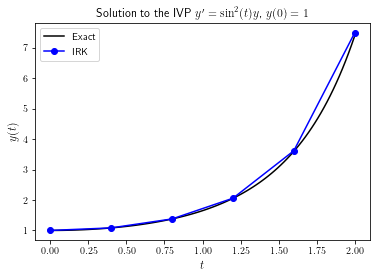

In [11]:
def f(t, y):
    return t * y

def exact_sol(t):
    return np.exp(t ** 2 / 2)

# Define IRK method
A = np.array([[ 1 / 4, -0 ], [ 1 / 2, 1 / 4 ]])
b = np.array([ 1 / 2, 1 / 2 ]).T
c = np.array([ 1 / 4, 3 / 4 ]).T

# Define IVP parameters
tspan = [0, 2]
y0 = 1
h = 0.4

# Solve IVP using the IRK method
t, y = irk(f, tspan, y0, h, A, b, c)

# Output solution table
print(' t     RK2    Exact\n' + '-' * 20)
for n in range(len(t)):
    print('{:3.2f} {:7.4f} {:7.4f}'.format(t[n], y[n], exact_sol(t[n])))

# Plot solutions
fig, ax = plt.subplots()

t1 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t1, exact_sol(t1), 'k-', label='Exact')
ax.plot(t, y, 'bo-', label='IRK')

ax.set_title("Solution to the IVP $y'=\sin^2(t)y$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

---
## Stability

Question 1. Determine the stability function of the following Runge-Kutta method

$$\begin{array}{c|ccccc}
0 \\
\frac{1}{4} & \frac{1}{4} \\
\frac{1}{2} & \frac{1}{2} & 0 \\
\frac{3}{4} & \frac{1}{2} & \frac{1}{4} \\
0 & 0 & \frac{1}{6} & -\frac{1}{3} & \frac{1}{6} \\ \hline
& -1 & \frac{2}{3} & -\frac{1}{3} & \frac{2}{3} & 1
\end{array}$$

**Solution:**

In [12]:
# Define ERK method
A = Matrix([[0, 0, 0, 0, 0],
            [Rational('1/4'), 0, 0, 0, 0],
            [Rational('1/2'), 0, 0, 0, 0],
            [Rational('1/2'), Rational('1/4'), 0, 0, 0],
            [0, Rational('1/6'), -Rational('1/3'), Rational('1/6'), 0]])
b = Matrix([-1, Rational('2/3'), -Rational('1/3'), Rational('2/3'), 1])
e = Matrix([[ 1, 1, 1, 1, 1 ]]).T

# Determine stability function
print("R(z) = 1", end="")
for k in range(len(b)):
    coeff = b.T * (A**k) * e
    print(" + {} z**{}".format(coeff[0], k+1), end="")

R(z) = 1 + 1 z**1 + 1/2 z**2 + 1/24 z**3 + 1/96 z**4 + 0 z**5

$$R(z) = 1 + z + \frac{1}{2} z^2 + \frac{1}{24} z^3 + \frac{1}{96} z^4$$

Question 2. Determine the stability function of the following Runge-Kutta method. Is this an A-stable method?

$$\begin{array}{c|cc}
\frac{1}{4} & \frac{7}{24} & -\frac{1}{24} \\
\frac{3}{4} & \frac{13}{24} & \frac{5}{24} \\  \hline
& \frac{1}{2} & \frac{1}{2}
\end{array}$$

**Solution:**

In [13]:
# Define IRK method
A = Matrix([[ Rational('7 / 24'), -Rational('1 / 24') ],
           [ Rational('13 / 24'), Rational('5 / 24') ]])
b = Matrix([[ Rational('1 / 2'), 0 ],
            [ 0, Rational('1 / 2') ]])
I = eye(2)

# Calculate P(z) and Q(z) polynomials
z = symbols('z')
P = expand(det(I - z * (A - b)))
Q = expand(det(I - z * A))

# Find roots of Q(z)
roots = solve(Q)

# Calculate E(y)
y = symbols('y')
Pp = expand(det(I + 1j * y * (A - b)))
Pm = expand(det(I - 1j * y * (A - b)))
Qp = expand(det(I + 1j * y * A))
Qm = expand(det(I - 1j * y * A))
E = expand(Qp * Qm - Pp * Pm)

# Output polynomials
print("P(z) = {}".format(P))
print("Q(z) = {}".format(Q))
print("Q(z) has roots at {} and {}".format(roots[0], roots[1]))
print("E(y) = {}".format(E))

P(z) = z**2/12 + z/2 + 1
Q(z) = z**2/12 - z/2 + 1
Q(z) has roots at 3 - sqrt(3)*I and 3 + sqrt(3)*I
E(y) = 0


The stability function is

$$R(z) = \frac{1 + \frac{1}{2}z + \frac{1}{12}z^2}{1 - \frac{1}{2}z + \frac{1}{12}z^2}$$, 

The roots of $Q(z)$ are $3 \pm \sqrt{3}i$ and $E(y)=0$ therefore this is an A-stable method.

Question 3. Plot the region of absolute stability for the following Runge-Kutta method.

$$\begin{array}{c|cc}
\frac{1}{3} & \frac{1}{3} & 0 \\
1 & 1 & 0 \\ \hline
& \frac{3}{4} & \frac{1}{4}
\end{array}$$

**Solution:**

In [14]:
# Define IRK method
A = Matrix([[ Rational('1 / 3'), 0 ],
           [ 1, 0 ]])
b = Matrix([[ Rational('3 / 4'), 0 ],
            [ 0, Rational('1 / 4') ]])
I = eye(2)

# Calculate P(z) and Q(z) polynomials
z = symbols('z')
P = expand(det(I - z * (A - b)))
Q = expand(det(I - z * A))

# Output polynomials
print("P(z) = {}".format(P))
print("Q(z) = {}".format(Q))

P(z) = 5*z**2/48 + 2*z/3 + 1
Q(z) = 1 - z/3


The stability function for this IRK method is

$$R(z) = \frac{1 + \frac{2}{3}z + \frac{5}{48}z^2}{1 - \frac{1}{3}z}.$$

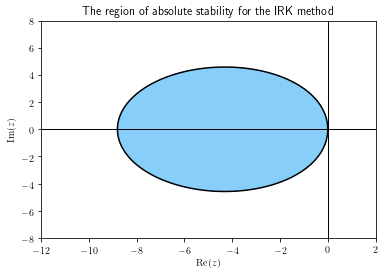

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Generate z values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
[X, Y] = np.meshgrid(x, y)
Z = X + Y * 1j

# Define stability function for the IRK method
R = (5 * Z ** 2 / 48 + 2 * Z / 3 + 1) / (1 - Z / 4)

# Plot the region of absolute stability
fig, ax = plt.subplots()

ax.contourf(X, Y, abs(R), levels=[0, 1], colors='lightskyblue')
ax.contour(X, Y, abs(R), levels=[1], colors='k')
ax.plot([-12, 10], [0, 0], 'k', linewidth=1)
ax.plot([0, 0], [-10, 10], 'k', linewidth=1)

ax.set_title('The region of absolute stability for the IRK method')
ax.set_xlabel('$\mathrm{Re}(z)$')
ax.set_ylabel('$\mathrm{Im}(z)$')
ax.set_xlim(-12, 2)
ax.set_ylim(-8, 8)

plt.show()

Question 4. Determine the stability function of the following Runge-Kutta method. What is the order of the method?

$$\begin{array}{c|ccccc}
0 \\
\frac{2}{7} & \frac{2}{7} \\
\frac{4}{7} & -\frac{8}{35} & \frac{4}{5} \\
\frac{6}{7} & \frac{29}{42} & -\frac{2}{3} & \frac{5}{6} \\
1 & \frac{1}{6} & \frac{1}{6} & \frac{5}{12} & \frac{1}{4} \\ \hline
& \frac{11}{96} & \frac{7}{24} & \frac{35}{96} & \frac{7}{48} & \frac{1}{12}
\end{array}$$

**Solution:**

In [16]:
# Define ERK method
A = Matrix([[0, 0, 0, 0, 0],
            [Rational('2/7'), 0, 0, 0, 0],
            [-Rational('8/35'), Rational('4/5'), 0, 0, 0],
            [Rational('29/42'), -Rational('2/3'), Rational('5/6'), 0, 0],
            [Rational('1/6'), Rational('1/6'), Rational('5/12'), Rational('1/4'), 0]])
b = Matrix([Rational('11/96'), -Rational('7/24'), Rational('35/96'), Rational('7/48'), Rational('1/12')])
e = Matrix([[ 1, 1, 1, 1, 1 ]]).T

# Determine stability function
print("R(z) = 1", end="")
for k in range(len(b)):
    coeff = b.T * (A**k) * e
    print(" + {} z**{}".format(coeff[0], k+1), end="")

R(z) = 1 + 5/12 z**1 + 1/3 z**2 + 1/6 z**3 + 1/24 z**4 + 1/252 z**5

$$R(z) = 1 + \frac{5}{12} z + \frac{1}{3} z^2 + \frac{1}{6} z^3 + \frac{1}{24} z^4 + \frac{1}{252} z^5$$

$R(z)$ agrees to the series expansion of $e^z$ up to the fourth-order term therefore this is a fourth-order method.

Question 5. Calculate the stiffness ratio for the following system of ODEs. What are the maximum step lengths that the Euler method is stable for solving each equation?

$$y_1' = -80.6y_1 + 119.4y_2, \\ y_2' = 79.6y_1 - 120.4y_2.$$

**Solution:**

In [17]:
# Define coefficient matrix
A = np.array([[ -80.6, 119.4 ],
              [ 79.6, -120.4 ]])

# Calculate eigenvalues
eigvals, eigvecs = np.linalg.eig(A);

# Calculate stiffness ratio
S = max(abs(eigvals.real)) / min(abs(eigvals.real))

print('The eigenvalues are {:0.4f} and {:0.4f}'.format(eigvals[0], eigvals[1]))
print('The stiffness ratio os S = {:0.1f}'.format(S))
print('The step lengths of the Euler method are h = {:0.4f} and {:0.4f}'. \
      format(-2 / eigvals.real[0], -2 / eigvals.real[1]))

The eigenvalues are -1.0000 and -200.0000
The stiffness ratio os S = 200.0
The step lengths of the Euler method are h = 2.0000 and 0.0100


The eigenvalues are $\lambda_1 = -1$ and $\lambda_2 = -200$ therefore the stiffness ratio is $S=200$. The maximum step lengths of the Euler method are $h=2$ and $h=0.01$.

---
## Boundary Value Problems

Question 1. Determine which of the following BVPs have a unique solutions:

(a) $y'' = -\dfrac{4}{t} y' + \dfrac{2}{t^2}y - \dfrac{2\ln(t)}{t^3}, \qquad t\in[1,2], \qquad y(1) = \dfrac{1}{2}, \qquad y(2) = \ln(2)$;

**Solution:**
$p(t) = -\dfrac{4}{t}$, $q(t) = \dfrac{2}{t^2}$ and $r(t) = -\dfrac{2\ln(t)}{t^3}$ are all continuous over the domain and $q(t)>0$ for all $t\in [1, 2]$ so the solution to this BVP is unique.

(b) $y'' = e^t + y\cos(t) - (t + 1) y', \qquad t \in [0, 2], \qquad y(0) = 1, \qquad y(2) = \ln(3)$;

**Solution:**
$p(t) = -(t+1)$, $q(t)=\cos(t)$ and $r(t)=e^t$. This BVP does not have a solution since $q(t)<0$ for $t\in\left[ \dfrac{\pi}{2}, 2\right]$.

(c) $y'' = (t^3 + 5)y + \sin(t), \qquad t \in [0, 1], \qquad y(0) = 0, \qquad y(1) = 1$;

**Solution:**
$p(t)=t^3 + 5$, $q(t)=0$ and $r(t)=\sin(t)$. This BVP does not have a solution since $q \not > 0$.

(d) $y'' = (5y + \sin(3t))e^t, \qquad t \in [0, 1], \qquad y(0) = 0, \qquad y(1) = 0$.

**Solution:**
$p(t)=0$, $q(t)=5e^t$ and $r(t)=e^t \sin(3t)$ are all continuous over the domain and $q(t)>0$ for all $t\in[0,1]$ so the solution to this BVP is unique. 

Question 2. Consider the following BVP

$$y'' = 2t, \qquad t \in [0, 2], \qquad y(0) = 1,  \qquad y(2) = 3.$$

Using a pen and calculator, calculate the Euler method solutions using a step length of $h=0.5$ for each of the following guess values:

(a) $s = 1$;

**Solution:**
This ODE can be written as the following system

$$\begin{aligned}
y_1' &= y_2, & y_1(0)&=1\\ 
y_2' &= 2t, & y_2(0)&= s.
\end{aligned}$$

Let $\mathbf{y} = \pmatrix{y_1 \cr y_2}$ and $F(t, \mathbf{y}) = \pmatrix{y_2 \cr 2t}$ and using $s=1$ then $\mathbf{y}_0 = \pmatrix{1 \cr 1}$

$$\begin{aligned}
\mathbf{y}_1 &= \mathbf{y}_0 + hF(t, \mathbf{y}_0) = \pmatrix{1 \cr 1} + 0.5\pmatrix{1 \cr 2(0)} = \pmatrix{1.5\cr 1}, & 
t_1 = t_0 + h = 0 + 0.5 = 0.5, \\
\mathbf{y}_2 &= \mathbf{y}_1 + hF(t, \mathbf{y}_1) = \pmatrix{1.5\cr 1}+ 0.5 \pmatrix{1 \cr 2(0.5)} = \pmatrix{2\cr 1.5}, &
t_2 = t_1 + h = 0.5 + 0.5 = 1, \\
\mathbf{y}_3 &= \mathbf{y}_2 + hF(t, \mathbf{y}_2) = \pmatrix{2 \cr 1.5} + 0.5\pmatrix{1.5 \cr 2(1)} = \pmatrix{2.75 \cr 2.5}, &
t_3 = t_2 + h = 1 + 0.5 = 1.5, \\
\mathbf{y}_4 &= \mathbf{y}_3 + h F(t, \mathbf{y}_3) = \pmatrix{2.75 \cr 2.5} + 0.5\pmatrix{2.5 \cr 2(1.5)} = \pmatrix{4 \cr 4}, &
t_4 = t_3 + h = 1.5 + 0.5 = 2.
\end{aligned}$$

(b) $s = -1$.

**Solution:** Using $s=-1$ then $\mathbf{y}_0 = \pmatrix{1 \cr -1}$:

$$\begin{aligned}
\mathbf{y}_1 &= \pmatrix{1 \cr -1} + 0.5\pmatrix{-1 \cr 2(0)} = \pmatrix{0.5\cr -1}, & 
t_1 = 0 + 0.5 = 0.5, \\
\mathbf{y}_2 &= \pmatrix{0.5\cr -1}+ 0.5 \pmatrix{-1 \cr 2(0.5)} = \pmatrix{0\cr -0.5}, &
t_2 = 0.5 + 0.5 = 1, \\
\mathbf{y}_3 &= \pmatrix{0 \cr -0.5} + 0.5\pmatrix{-0.5 \cr 2(1)} = \pmatrix{-0.25 \cr 0.5}, &
t_3 = 1 + 0.5 = 1.5, \\
\mathbf{y}_4 &= \pmatrix{-0.25 \cr 0.5} + 0.5\pmatrix{0.5 \cr 2(1.5)} = \pmatrix{0 \cr 2}, &
t_4 = 1.5 + 0.5 = 2.
\end{aligned}$$

Question 3. Use the Secant method to calculate the next value of $s$ for your solutions to the BVP in question 2 and hence calculate the Euler method using this new guess values.

**Solution:**

$$s_2 = s_0 - F(s_1) \frac{s_1 - s_0}{ F(s_1) - F(s_0)}=1 - (3-0)\frac{-1 - 1}{(3-0) - (3 - 4)} = 0.5.$$

Using $s = 0.5$ then $\mathbf{y}_0 = \pmatrix{ 1 \cr 0.5 }$:

$$\begin{aligned}
\mathbf{y}_1 &= \pmatrix{1 \cr 0.5} + 0.5\pmatrix{0.5 \cr 2(0)} = \pmatrix{1.25 \cr 0.5}, & 
t_1 = 0 + 0.5 = 0.5, \\
\mathbf{y}_2 &= \pmatrix{1.25 \cr 0.5}+ 0.5 \pmatrix{0.5 \cr 2(0.5)} = \pmatrix{1.5 \cr 1}, &
t_2 = 0.5 + 0.5 = 1, \\
\mathbf{y}_3 &= \pmatrix{1.5 \cr 1} + 0.5\pmatrix{1 \cr 2(1)} = \pmatrix{2 \cr 2}, &
t_3 = 1 + 0.5 = 1.5, \\
\mathbf{y}_4 &= \pmatrix{2 \cr 2} + 0.5\pmatrix{2 \cr 2(1.5)} = \pmatrix{3 \cr 3}, &
t_4 = 1.5 + 0.5 = 2.
\end{aligned}$$

So the solution is

$$\begin{aligned}
    \mathbf{t} &= \pmatrix{ 0.0 \cr 0.5 \cr 1.0 \cr 1.5 \cr 2.0 }, &
    \mathbf{y} &= \pmatrix{ 1 \cr 1.25 \cr 1.5 \cr 2 \cr 3}.
\end{aligned}$$

Question 4. Using a pen and calculator, calculate the solution of the BVP in question 2 using the finite-difference method with a step length $h=0.5$.

**Solution:**

Using $y'' = \dfrac{y_{i-1} - 2y_i + y_{i+1}}{h^2}$

$$\begin{aligned}
\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} &= 2t_i \\
y_{i-1} - 2y_i + y_{i+1} &= 2h^2t_i.
\end{aligned}$$

and for $i=N$ and $i=N-1$

$$\begin{aligned}
-2y_1 + y_2 &= 2h^2t_1 - y_0, \\ y_{N-2} - 2y_N &= 2h^2t_i - y_{N}.
\end{aligned}$$

Therefore we have the linear system

$$\pmatrix{-2 & 1 \cr 1 & -2 & 1 \cr & \ddots & \ddots & \ddots \cr & & 1 & -2 & 1 \cr & & & 1 & -2}
\pmatrix{y_1 \cr y_2 \cr \vdots \cr y_{N-2} \cr y_{N-1}} = 
\pmatrix{2h^2t_1 - y_0 \cr 2h^2t_2 \cr \vdots \cr 2h^2t_{N-2} \cr 2h^2t_{N-1} - y_N}.$$

Since $y_0=1$, $y_N=3$, $h=0.5$ so $\mathbf{t} = (0, 0.5, 1, 1.5, 2)^T$ and the linear system is

$$\pmatrix{-2 & 1& 0 \cr 1 & -2 & 1 \cr 0 & 1 & -2}\pmatrix{ y_1 \cr y_2 \cr y_3} = \pmatrix{-0.99 \cr 0.02 \cr -2.97}$$

The inverse of the coefficient matrix can be determined using the adjoint-determinant formula

$$\begin{aligned}
A{-1} &= \frac{1}{\det(A)}\text{adj}(A), \\
\det(A) &= -2 \left| \matrix{-2 & 1 \cr 1 & -2}\right|-\left| \matrix{1 & 1 \cr 0 & -2}\right| = -6 + 2 = -4, \\
\text{adj}(A) &= \pmatrix{3 & 2 & 1 \cr 2 & 4 & 2 \cr 1 & 2 & 3}^T = \pmatrix{3 & 2 & 1 \cr 2 & 4 & 2 \cr 1 & 2 & 3}, \\
\therefore A^{-1} &= -\frac{1}{4} \pmatrix{3 & 2 & 1 \cr 2 & 4 & 2 \cr 1 & 2 & 3}.
\end{aligned}$$

Using $\mathbf{y} = A^{-1} \mathbf{b}$ then

$$\pmatrix{ y_1 \cr y_2 \cr y_3} = -\frac{1}{4}\pmatrix{3 & 2 & 1 \cr 2 & 4 & 2 \cr 1 & 3 & 3} 
\pmatrix{ -0.99 \cr 0.02 \cr -2.97} =
\pmatrix{ 1.475 \cr 1.96 \cr 2.465}.$$

So the solution is $\mathbf{y} = (1, 1.475, 1.96, 2.465, 3)^T$.

Question 5. Write a Python program to repeat questions 3 and 4 using a step length of $h=0.1$. The exact solution to this BVP is $y = \frac{1}{3}t^3 - \frac{1}{3}t + 1$. Produce a plot of the numerical solutions and exact solution on the same set of axes.

In [18]:
def euler(f, tspan, y0, h):
    '''
    Calculuates the solution to an IVP using the Euler method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, len(y0)))
    t[0] = tspan[0]
    y[0, :] = y0

    # Solver loop
    for n in range(nsteps):
        y[n + 1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n + 1] = t[n] + h

    return t, y 

def tridiag_solver(a, b, c, d):
    '''
    Calculates the solution to a tridiagonal linear system of equations using
    the Thomas algorithm
    '''
    # Forward sweep
    for i in range(1, len(b)):
        w = a[i] / b[i-1]
        b[i] = b[i] - w * c[i-1]
        d[i] = d[i] - w * d[i-1]

    # Back substitution
    x = np.zeros(b.shape)
    x[-1] = d[-1] / b[-1]
    for i in range(len(b)-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
        
    return x

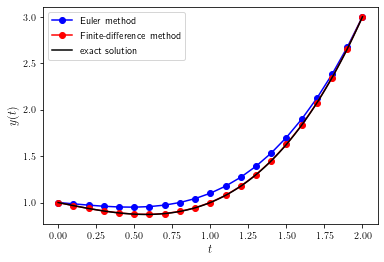

In [19]:
def f(t, y):
    return np.array([ y[1], 2 * t ])

def exact_sol(t):
    return 1/3 * t ** 3 - 1/3 * t + 1

# Define BVP parameters
tspan = [ 0 , 2 ]
bvals = [ 1, 3 ]
s0, s1, h = 1, -1, 0.1

# Shooting method solution
# Solve system using s = 1
t, y = euler(f, tspan, [ 1, s0 ], h)
F0 = bvals[1] - y[-1, 0]

# Solve system using s= -1
t, y = euler(f, tspan, [ 1, s1 ], h)
F1 = bvals[1] - y[-1, 0]

# Calculate next guess value using the Secant method
s2 = s1 - F1 * (s1 - s0) / (F1 - F0)

# Solve system using new guess value
t, y = euler(f, tspan, [ 1, s2 ], h)

# Finite-difference method solution
# Initialise solution array
N = int((tspan[1] - tspan[0]) / h) + 1
y1 = np.zeros(N)
y1[0] = bvals[0]
y1[-1] = bvals[-1]

# Define linear system
a = np.ones(N - 2)
b = -2 * np.ones(N - 2)
c = np.ones(N - 2)
d = 2 * h ** 2 * t[1:-1]
d[0] = d[0] - y1[0]
d[-1] = d[-1] - y1[-1]

# Solve linear system
y1[1:-1] = tridiag_solver(a, b, c, d)
    
#Plot solutions
fig, ax = plt.subplots()

t1 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t, y[:,0], 'bo-', label='Euler method')
ax.plot(t, y1, 'ro-', label='Finite-difference method')
ax.plot(t1, exact_sol(t1), 'k-', label='exact solution')

ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

---
## Direct Methods for Solving Systems of Linear Equations

Question 1. Solve the following systems of linear equations using LU decomposition using a pen and calculator.

(a) $2x_1 + 3x_2 - x_3 = 4, \\
4x_1 + 9x_2 - x_3 = 18, \\
\qquad 3x_2 + 2x_3 = 11.$

**Solution:** $L = \pmatrix{ 1 & 0 & 0 \cr 2 & 1 & 0 \cr 0 & 1 & 1 },
U = \pmatrix{ 2 & 3 & -1 \cr 0 & 3 & 1 \cr 0 & 0 & 1 },
\mathbf{x} = \pmatrix{ -2 \cr 3 \cr 1 }.$

(b) $3x_1 + 9x_2 + 5x_3 = 20, \\
 \,\,\,\,   x_1 + 2x_2 + 2x_3 = 3, \\
    2x_1 + 4x_2 + 5x_3 = 4.$
    
**Solution:** $L = \pmatrix{ 1 & 0 & 0 \cr 1/3 & 1 & 0 \cr 2/3 & 2 & 1 },
U = \pmatrix{ 3 & 9 & 5 \cr 0 & -1 & 1/3 \cr 0 & 0 & 1 },
\mathbf{x} = \pmatrix{ 1 \cr 3 \cr -2 }.$

(c) &emsp; $\qquad \,\,\,x_1 + 3x_3 + 2x_4 = 21, \\
    3x_1 - 2x_2 + 5x_3 + x_4 = 28, \\
    4x_1 - x_2 - 2x_3 - 3x_4 = -12, \\
   \qquad \qquad \,\,\, 2x_2 + 3x_4 = 13.$

**Solution:**
   $L = \pmatrix{ 1 & 0 & 0 & 0 \cr 3 & 1 & 0 & 0 \cr 4 & 1/2 & 1 & 0 \cr 0 & -1 & 1/3 & 1 },
    U = \pmatrix{ 1 & 0 & 3 & 2 \cr 0 & -2 & -4 & -5 \cr 0 & 0 & -12 & 17/2 \cr 0 & 0 & 0 & 5/6 },
    \mathbf{x} = \pmatrix{ 2 \cr -1 \cr 3 \cr 5 }.$
<br><br>
&emsp;&emsp; (d) &emsp; $\,\,\,\,\,\,x_1 + 5x_2 + 2x_3 + 2x_4 = -10, \\
\quad\,\,\,\,    -2x_1 - 4x_2 + 2x_3 = 10, \\
\quad\,\,    3x_1 + x_2 - 2x_3 - x_4 = -2, \\
    -3x_1 - 3x_2 + 4x_3 - x_4 = 4.$ 

**Solution:** 
$L = \pmatrix{ 1 & 0 & 0 & 0 \cr -2 & 1 & 0 & 0 \cr 3 & -7/3 & 1 & 0 \cr -3 & 2 & -1/3 & 1 },
U = \pmatrix{ 1 & 5 & 2 & 2 \cr 0 & 6 & 6 & 4 \cr 0 & 0 & 6 & 7/3 \cr 0 & 0 & 0 &  20/9 }, 
\mathbf{x} = \pmatrix{ 1 \cr -3 \cr 0 \cr 2 }.$
<br><br> 

Question 2. Solve the systems of linear equations from question 1 using LU decomposition with partial pivoting using a pen and calculator.

(a) $2x_1 + 3x_2 - x_3 = 4, \\
4x_1 + 9x_2 - x_3 = 18, \\
\qquad 3x_2 + 2x_3 = 11.$

**Solution:** 
$P = \pmatrix{ 0 & 1 & 0 \cr 1 & 0 & 0 \cr 0 & 0 & 1 }$, 
$L = \pmatrix{ 1 & 0 & 0 \cr 1/2 & 1 & 0 \cr 0 & -2 & 1 }$,
$U = \pmatrix{ 4 & 9 & -1 \cr 0 & -3/2 & -1/2 \cr 0 & 0 & 1 }$, 
$\mathbf{x} = \pmatrix{ -2 \cr 3 \cr 1 }$.

(b) $3x_1 + 9x_2 + 5x_3 = 20, \\
 \,\,\,\,   x_1 + 2x_2 + 2x_3 = 3, \\
    2x_1 + 4x_2 + 5x_3 = 4.$

**Solution:** $P = \pmatrix{ 1 & 0 & 0 \cr 0 & 0 & 1 \cr 0 & 1 & 0 }$, 
$L = \pmatrix{ 1 & 0 & 0 \cr 2/3 & 1 & 0 \cr 1/3 & 1/2 & 1 }$,
$U = \pmatrix{ 3 & 9 & 5 \cr 0 & -2 & 5/3 \cr 0 & 0 & -1/2 }$, 
$\mathbf{x} = \pmatrix{ 1 \cr 3 \cr -2 }$.

(c) $\qquad \,\,\,x_1 + 3x_3 + 2x_4 = 21, \\
    3x_1 - 2x_2 + 5x_3 + x_4 = 28, \\
    4x_1 - x_2 - 2x_3 - 3x_4 = -12, \\
   \qquad \qquad \,\,\, 2x_2 + 3x_4 = 13.$

**Solution:**
$P = \pmatrix{ 0 & 0 & 1 & 0 \cr 0 & 1 & 0 & 0 \cr 1 & 0 & 0 & 0 \cr 0 & 0 & 0 & 1 }$, 
$L = \pmatrix{ 1 & 0 & 0 & 0 \cr 3/4 & 1 & 0 & 0 \cr 1/3 & -1/5 & 1 & 0 \cr 0 & -8/5 & 13/6 & 1 }$,
$U = \pmatrix{ 4 & -1 & -2 & -3 \cr 0 & -5/4 & 13/2 & 7/4 \cr 0 & 0 & 24/5 & 17/4 \cr 0 & 0 & 0 & 5/6 }$, 
$\mathbf{x} = \pmatrix{ 2 \cr -1 \cr 3 \cr 5 }$.

(d) $x_1 + 5x_2 + 2x_3 + 2x_4 = -10, \\
-2x_1 - 4x_2 + 2x_3 = 10, \\
3x_1 + x_2 - 2x_3 - x_4 = -2, \\
    -3x_1 - 3x_2 + 4x_3 - x_4 = 4.$

**Solution:** $P = \pmatrix{ 0 & 0 & 1 & 0 \cr 0 & 1 & 0 & 0 \cr 0 & 0 & 0 & 1 \cr 1 & 0 & 0 & 0 }$, 
$L = \pmatrix{ 1 & 0 & 0 & 0 \cr -2/3 & 1 & 0 & 0 \cr -1 & 3/5 & 1 & 0 \cr 1/3 & -7/5 & 9/4 & 1}$,
$U = \pmatrix{ 3 & 1 & -2 & -1 \cr 0 & -10/3 & 2/3 & -2/3 \cr 0 & 0 & 8/5 & -8/5 \cr 0 & 0 & 0 & 5  }$, 
$\mathbf{x} = \pmatrix{ 1 \cr -3 \cr 0 \cr 2 }$.

Question 3. Solve the following systems of linear equations using Cholesky decomposition using a pen and calculator. 

(a) $\,\,\,\,16x_1 + 16x_2 + 4x_3 = -8, \\
    16x_1 + 25x_2 + 10x_3 = -47, \\
\quad     4x_1 + 10x_2 + 6x_3 = -30.$

**Solution:** $L = \pmatrix{ 4 & 0 & 0 \cr 4 & 3 & 0 \cr 1 & 2 & 1 }$, 
$\mathbf{x} = \pmatrix{ 3 \cr -3 \cr -2 }$.

(b) $\quad 4x_1 + 2x_2 + 8x_3 = 36, \\
    2x_1 + 17x_2 + 20x_3 = 50, \\
    8x_1 + 20x_2 + 41x_3 = 122.$

**Solution:** $L = \pmatrix{ 2 & 0 & 0 \cr 1 & 4 & 0 \cr 4 & 4 & 3 }$, 
$\mathbf{x} = \pmatrix{ 5 \cr 0 \cr 2 }$.

(c) $\qquad \qquad \,9x_1 - 9x_2 - 6x_4 = 12, \\
    -9x_1 + 25x_2 + 8x_3 - 10x_4 = -116, \\
 \qquad \qquad \,   8x_2 + 8x_3 - 2x_4 = -58, \\
    -6x_1 - 10x_2 - 2x_3 + 33x_4 = 91.$

**Solution:** $L = \pmatrix{ 3 & 0 & 0 & 0 \cr -3 & 4 & 0 & 0 \cr 0 & 2 & 2 & 0 \cr -2 & -4 & -3 & 1 }$, 
$\mathbf{x} = \pmatrix{ -2 \cr -4 \cr -3 \cr 1 }$.

(d) $\qquad\,\,\,\,\, x_1 + 5x_2 - x_3 + 2x_4 = 14, \\
\,\,\,\,\,    5x_1 + 29x_2 + 3x_3 + 12x_4 = 82, \\
\,    -x_1 + 3x_2 + 42x_3 - 13x_4 = 40, \\
    2x_1 + 12x_2 - 13x_3 + 39x_4 = -34.$

**Solution:** $L = \pmatrix{ 1 & 0 & 0 & 0 \cr 5 & 2 & 0 & 0 \cr -1 & 4 & 5 & 0 \cr 2 & 1 & -3 & 5 }$, 
$\mathbf{x} = \pmatrix{ -2 \cr 4 \cr 0 \cr -2 }$.

Question 4. Calculate the QR decomposition of the coefficient matrix for the following systems using the Gram-Schmidt process with a pen and calculator.

(a) $x_1 + x_2 = 9, \\
\,\,\,\,\,\,    -x_1 = -5.$

**Solution:** $Q = \pmatrix{ \sqrt{2}/2 & \sqrt{2}/2 \cr -\sqrt{2}/2 & \sqrt{2}/2 }$, 
$R = \pmatrix{ \sqrt{2} & \sqrt{2}/2 \cr 0 & \sqrt{2}/2 }$.

(b) $6x_1 + 6x_2 + x_3 = 3, \\
    3x_1 + 6x_2 + x_3 = 0, \\
\,\,\,\,    2x_1 + x_2 + x_3 = 4.$

**Solution:** $Q = \pmatrix{ 6/7 & -2/7 & -3/7 \cr 3/7 & 6/7 & 2/7 \cr 2/7 & -3/7 & 6/7 }$,
$R = \pmatrix{ 7 & 8 & 11/7 \cr 0 & 3 & 1/7 \cr 0 & 0 & 5/7 }$.

(c) $\,\,\,\,x_1 + 2x_2 + x_3 = 1, \\
    x_1 + 4x_2 + 3x_3 = 7, \\
    x_1 - 4x_2 + 6x_3 = -6, \\
 \,\,\,\,   x_1 + 2x_2 + x_3 = -1.$

**Solution:** $Q = \pmatrix{ 1/2 & 1/6 & -\sqrt{2}/3 \cr 1/2 & 1/2 & \sqrt{2}/2 \cr 1/2 & -5/6 & \sqrt{2}/6 \cr 1/2 & 1/6 & -\sqrt{2}/3 }$,
$R = \pmatrix{ 2 & 2 & 11/2 \cr 0 & 6 & -19/6 \cr 0 & 0 & 11\sqrt{2}/6 }$.

Question 5. Repeat question 4 using Householder reflections.

(a) $x_1 + x_2 = 9, \\
\,\,\,\,\,\,    -x_1 = -5.$

**Solution:** $Q = \pmatrix{ -\sqrt{2}/2 & -\sqrt{2}/2 \cr \sqrt{2}/2 & -\sqrt{2}/2 }$, 
$R = \pmatrix{ -\sqrt{2} & -\sqrt{2}/2 \cr 0 & -\sqrt{2}/2 }$.

(b) $6x_1 + 6x_2 + x_3 = 3, \\
    3x_1 + 6x_2 + x_3 = 0, \\
\,\,\,\,    2x_1 + x_2 + x_3 = 4.$

**Solution:** $Q = \pmatrix{ -6/7 & 2/7 & 3/7 \cr -3/7 & -6/7 & -2/7 \cr -2/7 & 3/7 & -6/7 }$,
$R = \pmatrix{ -7 & -8 & -11/7 \cr 0 & -3 & -1/7 \cr 0 & 0 & -5/7 }$.

(c) $\,\,\,\,x_1 + 2x_2 + x_3 = 1, \\
    x_1 + 4x_2 + 3x_3 = 7, \\
    x_1 - 4x_2 + 6x_3 = -6, \\
 \,\,\,\,   x_1 + 2x_2 + x_3 = -1.$

**Solution:** $Q = \pmatrix{-1/2 & -1/6 & \sqrt{2}/3 & - \sqrt{2}/2 \cr -1/2 & -1/2 & -\sqrt{2}/2 & 0 \cr -1/2 & 5/6 & -\sqrt{2}/6 & 0 \cr -1/2 & -1/6 & \sqrt{2}/3 & \sqrt{2}/2}$,
$R = \pmatrix{ -2 & -2 & -11/2 \cr 0 & -6 & 19/6 \cr 0 & 0 & -11\sqrt{2}/6 }$.

Question 6. Calculate the solutions to the linear systems in question 4 using QR decomposition.

(a) $\mathbf{x} = \pmatrix{ 5 \cr 4 }$.

(b) $\mathbf{x} = \pmatrix{ 1 \cr -1 \cr 3 }$.

(c) $\mathbf{x} = \pmatrix{ -62/11 \cr 47/22 \cr 15/11 }$.

7. Check your solutions to questions 1 to 6 using Python.

**Solution:**

In [20]:
def lu(A):
    '''
    Calculates the lu decomposition of the square matrix A
    '''
    # Initialise L and U
    ncols = len(A)
    L = np.eye(ncols)
    U = np.zeros((ncols, ncols))

    # Loop through columns
    for j in range(ncols):
        
        # Calculate u_ij for i <= j
        for i in range(j+1):
            for k in range(i):
                U[i,j] += L[i,k] * U[k,j]
            U[i,j] = A[i,j] - U[i,j]
            
        # Calculate l_ij for i > j
        for i in range(j+1, ncols):
            for k in range(j):
                L[i,j] += L[i,k] * U[k,j]
            L[i,j] = (A[i,j] - L[i,j]) / U[j, j]
        
    return L, U

def forward_sub(L, b):
    '''
    Calculates the solution to Lx = b where L is a lower triangular matrix
    using forward substitution
    '''
    ncols = len(b)
    x = np.zeros(ncols)
    for i in range(ncols):
        for j in range(0, i):
            x[i] += L[i,j] * x[j]
        x[i] = (b[i] - x[i]) / L[i, i]   
        
    return x

def back_sub(U, b):
    '''
    Calculates the solution to Ux = b where U is a upper triangular matrix
    using back substitution
    '''
    ncols = len(b)
    x = np.zeros(ncols)
    for i in range(ncols-1, -1, -1):
        for j in range(i, ncols):
            x[i] += U[i,j] * x[j]
        x[i] = (b[i] - x[i]) / U[i,i]
        
    return x 

def crout(L, U, b):
    '''
    Calculates the solution to the system of linear equations lux=b using Crouts
    algorithm
    '''
    # Solve Ly = b using forward substitution
    y = forward_sub(L, b)
    
    # Solve Ux = y using back substitution
    x = back_sub(U, y) 
    
    return x 

In [21]:
# Question 1 
# (a)
A = np.array([[ 2, 3, -1 ], [ 4, 9, -1 ], [ 0, 3, 2 ]])
b = np.array([ 4, 18, 11 ])

# Calculate lu decomposition of A
L, U = lu(A)

# Calculate solution to Ax = b using Crout's method
x = crout(L, U, b)

# Output results
print('Question 1 (a)')
print('L = ')
print(L)
print('U = ')
print(U)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))
    
# (b)
A = np.array([[ 3, 9, 5 ], [ 1, 2, 2 ], [ 2, 4, 5 ]])
b = np.array([ 20, 3, 4 ])

# Calculate lu decomposition of A
L, U = lu(A)

# Calculate solution to Ax = b using Crout's method
x = crout(L, U, b)

# Output results
print('\nQuestion 1 (b)')
print('L = ')
print(L)
print('U = ')
print(U)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))
    
# (c)
A = np.array([[ 1, 0, 3, 2 ], [ 3, -2, 5, 1 ], [ 4, -1, -2, -3 ], [0, 2, 0, 3 ]])
b = np.array([ 21, 28, -12, 13 ])

# Calculate lu decomposition of A
L, U = lu(A)

# Calculate solution to Ax = b using Crout's method
x = crout(L, U, b)

# Output results
print('\nQuestion 1 (c)')
print('L = ')
print(L)
print('U = ')
print(U)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))

# (d)
A = np.array([[ 1, 5, 2, 2 ], [ -2, -4, 2, 0], [ 3, 1, -2, -1 ], [ -3, -3, 4, -1 ]])
b = np.array([ -10, 10, -2, 4 ])

# Calculate lu decomposition of A
L, U = lu(A)

# Calculate solution to Ax = b using Crout's method
x = crout(L, U, b)

# Output results
print('\nQuestion 1 (d)')
print('L = ')
print(L)
print('U = ')
print(U)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))

Question 1 (a)
L = 
[[1. 0. 0.]
 [2. 1. 0.]
 [0. 1. 1.]]
U = 
[[ 2.  3. -1.]
 [ 0.  3.  1.]
 [ 0.  0.  1.]]

x_1 = -2.0
x_2 = 3.0
x_3 = 1.0

Question 1 (b)
L = 
[[1.         0.         0.        ]
 [0.33333333 1.         0.        ]
 [0.66666667 2.         1.        ]]
U = 
[[ 3.          9.          5.        ]
 [ 0.         -1.          0.33333333]
 [ 0.          0.          1.        ]]

x_1 = 1.0000000000000024
x_2 = 2.999999999999999
x_3 = -2.0

Question 1 (c)
L = 
[[ 1.          0.          0.          0.        ]
 [ 3.          1.          0.          0.        ]
 [ 4.          0.5         1.          0.        ]
 [ 0.         -1.          0.33333333  1.        ]]
U = 
[[  1.           0.           3.           2.        ]
 [  0.          -2.          -4.          -5.        ]
 [  0.           0.         -12.          -8.5       ]
 [  0.           0.           0.           0.83333333]]

x_1 = 2.0
x_2 = -1.0
x_3 = 3.0000000000000004
x_4 = 4.999999999999999

Question 1 (d)
L = 
[[

In [22]:
def partial_pivot(A):
    '''
    Applies partial pivotting to A and returns the permutation matrix P
    '''
    ncols = len(A)
    P = np.eye(ncols)
    
    # Loop through columns
    for j in range(ncols):
        
        # Look for max pivot
        maxpivot, k = A[j,j], j
        for i in range (j, ncols):
            if abs(A[i,j]) > abs(maxpivot):
                maxpivot, k = A[i,j], i
        
        # Swap pivot row with max pivot row
        P[[j,k],:] = P[[k,j],:]
    
    return P

In [23]:
# Question 2
# (a)
A = np.array([[ 2, 3, -1 ], [ 4, 9, -1 ], [ 0, 3, 2 ]])
b = np.array([ 4, 18, 11 ])

# Calculate permutation matrix P
P = partial_pivot(A)

# Calculate lu decomposition of PA
PA = np.matmul(P, A)
L, U = lu(PA)

# Use Crout's method to solve lux = Pb
Pb = np.matmul(P, b)
x = crout(L, U, Pb)

# Output results
print('\nQuestion 2 (a)')
print('L = ')
print(L)
print('U = ')
print(U)
print('P = ')
print(P)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))

# (b)
A = np.array([[ 3, 9, 5 ], [ 1, 2, 2 ], [ 2, 4, 5 ]])
b = np.array([ 20, 3, 4 ])

# Calculate permutation matrix P
P = partial_pivot(A)

# Calculate lu decomposition of PA
PA = np.matmul(P, A)
L, U = lu(PA)

# Use Crout's method to solve lux = Pb
Pb = np.matmul(P, b)
x = crout(L, U, Pb)

# Output results
print('\nQuestion 2 (b)')
print('L = ')
print(L)
print('U = ')
print(U)
print('P = ')
print(P)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))

# (c)
A = np.array([[ 1, 0, 3, 2 ], [ 3, -2, 5, 1 ], [ 4, -1, -2, -3 ], [0, 2, 0, 3 ]])
b = np.array([ 21, 28, -12, 13 ])

# Calculate permutation matrix P
P = partial_pivot(A)

# Calculate lu decomposition of PA
PA = np.matmul(P, A)
L, U = lu(PA)

# Use Crout's method to solve lux = Pb
Pb = np.matmul(P, b)
x = crout(L, U, Pb)

# Output results
print('\nQuestion 2 (c)')
print('L = ')
print(L)
print('U = ')
print(U)
print('P = ')
print(P)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))

# (d)
A = np.array([[ 1, 5, 2, 2 ], [ -2, -4, 2, 0], [ 3, 1, -2, -1 ], [ -3, -3, 4, -1 ]])
b = np.array([ -10, 10, -2, 4 ])

# Calculate permutation matrix P
P = partial_pivot(A)

# Calculate lu decomposition of PA
PA = np.matmul(P, A)
L, U = lu(PA)

# Use Crout's method to solve lux = Pb
Pb = np.matmul(P, b)
x = crout(L, U, Pb)

# Output results
print('\nQuestion 2 (d)')
print('L = ')
print(L)
print('U = ')
print(U)
print('P = ')
print(P)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))


Question 2 (a)
L = 
[[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [ 0.  -2.   1. ]]
U = 
[[ 4.   9.  -1. ]
 [ 0.  -1.5 -0.5]
 [ 0.   0.   1. ]]
P = 
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

x_1 = -2.0
x_2 = 3.0
x_3 = 1.0

Question 2 (b)
L = 
[[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.5        1.        ]]
U = 
[[ 3.          9.          5.        ]
 [ 0.         -2.          1.66666667]
 [ 0.          0.         -0.5       ]]
P = 
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

x_1 = 1.0000000000000024
x_2 = 2.999999999999999
x_3 = -2.0

Question 2 (c)
L = 
[[ 1.          0.          0.          0.        ]
 [ 0.75        1.          0.          0.        ]
 [ 0.25       -0.2         1.          0.        ]
 [ 0.         -1.6         2.16666667  1.        ]]
U = 
[[ 4.         -1.         -2.         -3.        ]
 [ 0.         -1.25        6.5         3.25      ]
 [ 0.          0.          4.8         3.4       ]
 [ 0.          0.          0.          0.83333333]

In [24]:
def cholesky(A):
    '''
    Calculates the Cholesky decomposition of a positive definite matrix A
    '''
    ncols = len(A)
    L = np.zeros(A.shape)
    
    # Loop through columns
    for j in range(ncols):
        
        # Calculate main diagonal element
        for k in range(j):
            L[j,j] += L[j,k]**2
        L[j,j] = np.sqrt(A[j,j] - L[j,j])
        
        # Calculate lower triangular elements
        for i in range(j+1, ncols):
            for k in range(j):
                L[i,j] += L[i,k] * L[j,k]
            L[i,j] = (A[i,j] - L[i,j]) / L[j,j]
    
    return L

In [25]:
# Question 3
# (a)
A = np.array([[ 16, 16, 4 ], [ 16, 25, 10 ], [ 4, 10, 6 ]])
b = np.array([ -8, -47, -30 ])

# Calculate Cholesky decomposition
L = cholesky(A)

# Solve linear system using the Cholesky-Crout method
x = crout(L, L.T, b)

# Output results
print('\nQuestion 3 (a)')
print('L = ')
print(L)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i, x[i]))
    
# (b)
A = np.array([[ 4, 2, 8 ], [ 2, 17, 20 ], [8, 20, 41 ]])
b = np.array([ 36, 50, 122 ])

# Calculate Cholesky decomposition
L = cholesky(A)

# Solve linear system using the Cholesky-Crout method
x = crout(L, L.T, b)

# Output results
print('\nQuestion 3 (b)')
print('L = ')
print(L)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i, x[i]))
    
# (c)
A = np.array([[ 9, -9, 0, -6 ], [-9, 25, 8, -10 ], [0, 8, 8, -2 ], [ -6, -10, -2, 33 ]])
b = np.array([ 12, -116, -58, 91 ])

# Calculate Cholesky decomposition
L = cholesky(A)

# Solve linear system using the Cholesky-Crout method
x = crout(L, L.T, b)

# Output results
print('\nQuestion 3 (c)')
print('L = ')
print(L)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i, x[i]))

# (d)
A = np.array([[ 1, 5, -1, 2 ], [5, 29, 3, 12 ], [ -1, 3, 42, -13 ], [ 2, 12, -13, 39 ]])
b = np.array([ 14, 82, 40, -34 ])

# Calculate Cholesky decomposition
L = cholesky(A)

# Solve linear system using the Cholesky-Crout method
x = crout(L, L.T, b)

# Output results
print('\nQuestion 3 (d)')
print('L = ')
print(L)
print()
for i in range(len(x)):
    print('x_{} = {}'.format(i, x[i]))


Question 3 (a)
L = 
[[4. 0. 0.]
 [4. 3. 0.]
 [1. 2. 1.]]

x_0 = 3.0
x_1 = -3.0
x_2 = -2.0

Question 3 (b)
L = 
[[2. 0. 0.]
 [1. 4. 0.]
 [4. 4. 3.]]

x_0 = 5.0
x_1 = 0.0
x_2 = 2.0

Question 3 (c)
L = 
[[ 3.  0.  0.  0.]
 [-3.  4.  0.  0.]
 [ 0.  2.  2.  0.]
 [-2. -4.  3.  2.]]

x_0 = -2.0
x_1 = -4.0
x_2 = -3.0
x_3 = 1.0

Question 3 (d)
L = 
[[ 1.  0.  0.  0.]
 [ 5.  2.  0.  0.]
 [-1.  4.  5.  0.]
 [ 2.  1. -3.  5.]]

x_0 = -2.0
x_1 = 4.0
x_2 = 0.0
x_3 = -2.0


In [26]:
def qr_gs(A):
    '''
    Calculates the qr_gs decomposition of the m x n matrix A using the 
    Gram-Schmidt process
    '''
    ncols = A.shape[1]
    R = np.zeros((ncols, ncols))
    Q = np.zeros(A.shape)

    # Loop through columns of A
    for j in range(ncols):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            Q[:,j] += R[i,j] * Q[:,i]
            
        Q[:,j] = A[:,j] - Q[:,j]
        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] = Q[:,j] / R[j,j]
        
    return Q, R

In [27]:
# Question 4
# (a)
# Define linear system
A = np.array([[ 1, 1 ], [ -1, 0 ]])
b = np.array([ 9, -5 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Output Q and R
print('\nQuestion 4 (a)')
print('Q = ')
print(Q)
print('R = ')
print(R)

# (b)
# Define linear system
A = np.array([[ 6, 6, 1 ], [ 3, 6, 1 ], [ 2, 1, 1 ]])
b = np.array([ 3, 0, 4 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Output Q and R
print('\nQuestion 4 (b)')
print('Q = ')
print(Q)
print('R = ')
print(R)

# (c)
# Define linear system
A = np.array([[ 1, 2, 1 ], [ 1, 4, 3 ], [ 1, -4, 6 ], [ 1, 2, 1 ]])
b = np.array([ 1, 7, -6, -1 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Output Q and R 
print('\nQuestion 4 (c)')
print('Q = ')
print(Q)
print('R = ')
print(R)


Question 4 (a)
Q = 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
R = 
[[1.41421356 0.70710678]
 [0.         0.70710678]]

Question 4 (b)
Q = 
[[ 0.85714286 -0.28571429 -0.42857143]
 [ 0.42857143  0.85714286  0.28571429]
 [ 0.28571429 -0.42857143  0.85714286]]
R = 
[[7.         8.         1.57142857]
 [0.         3.         0.14285714]
 [0.         0.         0.71428571]]

Question 4 (c)
Q = 
[[ 0.5         0.16666667 -0.47140452]
 [ 0.5         0.5         0.70710678]
 [ 0.5        -0.83333333  0.23570226]
 [ 0.5         0.16666667 -0.47140452]]
R = 
[[ 2.          2.          5.5       ]
 [ 0.          6.         -3.16666667]
 [ 0.          0.          2.59272486]]


In [28]:
def qr_hh(A):
    '''
    Calculates the QR decomposition of the m x n matrix A using the 
    Householder reflections
    '''
    nrows, ncols = A.shape
    Q = np.eye(nrows)
    R = A
    for i in range(ncols):

        # Calculate Householder matrix
        H = np.eye(nrows)
        a = R[i:,i]
        v = a + np.sign(a[0]) * np.linalg.norm(a) * np.eye(nrows - i)[:,0]
        H[i:,i:] = np.eye(nrows - i) - 2 * np.matmul(v[:,None], v[None,:])\
            / np.matmul(v.T, v)

        # Apply Householder reflection to R and update Q
        R = np.matmul(H, R)
        Q = np.matmul(H, Q)
    
    return Q, R

In [29]:
# Question 5
# (a)
# Define linear system
A = np.array([[ 1, 1 ], [ -1, 0 ]])
b = np.array([ 9, -5 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Output Q and R
print('\nQuestion 5 (a)')
print('Q = ')
print(Q)
print('R = ')
print(R)

# (b)
# Define linear system
A = np.array([[ 6, 6, 1 ], [ 3, 6, 1 ], [ 2, 1, 1 ]])
b = np.array([ 3, 0, 4 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Output Q and R
print('\nQuestion 5 (b)')
print('Q = ')
print(Q)
print('R = ')
print(R)

# (c)
# Define linear system
A = np.array([[ 1, 2, 1 ], [ 1, 4, 3 ], [ 1, -4, 6 ], [ 1, 2, 1 ]])
b = np.array([ 1, 7, -6, -1 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Output Q and R
print('\nQuestion 5 (c)')
print('Q = ')
print(Q)
print('R = ')
print(R)


Question 5 (a)
Q = 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
R = 
[[1.41421356 0.70710678]
 [0.         0.70710678]]

Question 5 (b)
Q = 
[[ 0.85714286 -0.28571429 -0.42857143]
 [ 0.42857143  0.85714286  0.28571429]
 [ 0.28571429 -0.42857143  0.85714286]]
R = 
[[7.         8.         1.57142857]
 [0.         3.         0.14285714]
 [0.         0.         0.71428571]]

Question 5 (c)
Q = 
[[ 0.5         0.16666667 -0.47140452]
 [ 0.5         0.5         0.70710678]
 [ 0.5        -0.83333333  0.23570226]
 [ 0.5         0.16666667 -0.47140452]]
R = 
[[ 2.          2.          5.5       ]
 [ 0.          6.         -3.16666667]
 [ 0.          0.          2.59272486]]


In [30]:
# Question 6
# (a)
# Define linear system
A = np.array([[ 1, 1 ], [ -1, 0 ]])
b = np.array([ 9, -5 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Solve Rx = Q.T b using back substitution
QTb = np.matmul(Q.T, b)
x = back_sub(R, QTb)

# Output solution 
print('\nQuestion 6 (a)')
for i in range(len(x)):
    print('x_{} = {:0.6f}'.format(i, x[i]))

# (b)
# Define linear system
A = np.array([[ 6, 6, 1 ], [ 3, 6, 1 ], [ 2, 1, 1 ]])
b = np.array([ 3, 0, 4 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Solve Rx = Q.T b using back substitution
QTb = np.matmul(Q.T, b)
x = back_sub(R, QTb)

# Output solution 
print('\nQuestion 6 (b))')
for i in range(len(x)):
    print('x_{} = {:0.6f}'.format(i, x[i]))

# (c)
# Define linear system
A = np.array([[ 1, 2, 1 ], [ 1, 4, 3 ], [ 1, -4, 6 ], [ 1, 2, 1 ]])
b = np.array([ 1, 7, -6, -1 ])

# Calculate qr_gs decomposition of A
Q, R = qr_gs(A)

# Solve Rx = Q.T b using back substitution
QTb = np.matmul(Q.T, b)
x = back_sub(R, QTb)

# Output solution 
print('\nQuestion 6 (c)')
for i in range(len(x)):
    print('x_{} = {:0.6f}'.format(i, x[i]))


Question 6 (a)
x_0 = 5.000000
x_1 = 4.000000

Question 6 (b))
x_0 = 1.000000
x_1 = -1.000000
x_2 = 3.000000

Question 6 (c)
x_0 = -5.636364
x_1 = 2.136364
x_2 = 1.363636


---
## Indirect Methods for Solving Systems of Linear Equations

Question 1. Using a pen and calculator, calculate the first 2 iterations of the Jacobi method for solving the system of linear equations below. Use starting values of $x_i^{(0)}=0$ and work to 4 decimal places.

$$ \begin{aligned}
4x_1 + x_2 - x_3 + x_4 &= 14 ,\\
x_1 + 4x_2 - x_3 - x_4 &= 10, \\
-x_1 -x_2 + 5x_3 + x_4 &= -15, \\
x_1 - x_2 + x_3 + 3x_4 &= 3.
\end{aligned} $$

**Solution:** The Jacobi method for this system is
$$ \begin{aligned}
x_1^{(k+1)} &= \frac{1}{4}(14 - x_2^{(k)} + x_3^{(k)} - x_4^{(k)}), \\
x_2^{(k+1)} &= \frac{1}{4}(10 - x_1^{(k)} + x_3^{(k)} + x_4^{(k)}), \\
x_3^{(k+1)} &= \frac{1}{5}(-15 + x_1^{(k)} + x_2^{(k)} - x_4^{(k)}), \\
x_4^{(k+1)} &= \frac{1}{3}(3 - x_1^{(k)} + x_2^{(k)} - x_3^{(k)}).
\end{aligned} $$

Using starting values of $\mathbf{x}^{(0)} = (0, 0, 0, 0)^T$

$$ \begin{aligned}
x_1^{(1)} &= \frac{1}{4}(14 - 0 + 0 - 0) = 3.5, \\
x_2^{(2)} &= \frac{1}{4}(10 - 0 + 0 + 0) = 2.5, \\
x_3^{(3)} &= \frac{1}{5}(-15 + 0 + 0 - 0) = -3, \\
x_4^{(4)} &= \frac{1}{3}(3 - 0 + 0 - 0) = 1.
\end{aligned} $$

Calculate the residual

$$\mathbf{r} = \pmatrix{14, \cr 10 \cr -15 \cr 3} -
\pmatrix{4 & 1 & -1 & 1 \cr 1 & 4 & -1 & -1 \cr -1 & -1 & 5 & 1 \cr 1 & -1 & 1 & 3}
\pmatrix{ 3.5 \cr 2.5 \cr -3 \cr 1 } =
\pmatrix{ -6.5 \cr -5.5 \cr 5 \cr 2 },$$

so $|\mathbf{r}| = \sqrt{(-6.5)^2 + (-5.5)^2 + 5^2 + 2^2} = 10.0747$.

$$ \begin{aligned}
x_1^{(2)} = \frac{1}{4}(14 - 2.5 - 3 - 1) = 1.875, \\
x_2^{(2)} = \frac{1}{4}(10 - 3.5 - 3 + 1) = 1.125, \\
x_3^{(2)} = \frac{1}{5}(-15 + 3.5 - 5.5 - 1) = -2, \\
x_4^{(2)} = \frac{1}{3}(3 - 1.875 + 2.5 +3) = 1.6667.
\end{aligned} $$

Calculate the residual

$$\mathbf{r} = \pmatrix{14, \cr 10 \cr -15 \cr 3} -
\pmatrix{4 & 1 & -1 & 1 \cr 1 & 4 & -1 & -1 \cr -1 & -1 & 5 & 1 \cr 1 & -1 & 1 & 3}
\pmatrix{ 1.875 \cr 1.125 \cr -2 \cr 1.6667 } =
\pmatrix{ 1.7083 \cr 3.2917 \cr -3.6667 \cr -0.75 },$$

so $|\mathbf{r}| = \sqrt{1.7083^2 + 3.2917^2 + (-3.6667)^2 + (-0.75)^2} = 5.2688$.

Question 2. Repeat question 1 using the Gauss-Seidel method.

**Solution:**  The Gauss-Seidel method for this system is

$$ \begin{aligned}
x_1^{(k+1)} &= \frac{1}{4}(14 - x_2^{(k)} + x_3^{(k)} - x_4^{(k)}), \\
x_2^{(k+1)} &= \frac{1}{4}(10 - x_1^{(k+1)} + x_3^{(k)} + x_4^{(k)}), \\
x_3^{(k+1)} &= \frac{1}{5}(-15 + x_1^{(k+1)} + x_2^{(k+1)} - x_4^{(k)}), \\
x_4^{(k+1)} &= \frac{1}{3}(3 - x_1^{(k+1)} + x_2^{(k+1)} - x_3^{(k+1)}).
\end{aligned} $$

Using starting values of $\mathbf{x}^{(0)} = (0, 0, 0, 0)^T$

$$ \begin{aligned}
x_1^{(1)} &= \frac{1}{4}(14 - 0 + 0 - 0) = 3.5, \\
x_2^{(2)} &= \frac{1}{4}(10 - 3.5 + 0 + 0) = 1.625, \\
x_3^{(3)} &= \frac{1}{5}(-15 + 3.5 + 1.625 - 0) = -1.975, \\
x_4^{(4)} &= \frac{1}{3}(3 - 3.5 + 1.625 + 1.975) = 1.0333.
\end{aligned} $$

Calculate the residual

$$\mathbf{r} = \pmatrix{14, \cr 10 \cr -15 \cr 3} -
\pmatrix{4 & 1 & -1 & 1 \cr 1 & 4 & -1 & -1 \cr -1 & -1 & 5 & 1 \cr 1 & -1 & 1 & 3}
\pmatrix{ 3.5 \cr 1.625  \cr -1.975 \cr 1.0333 } =
\pmatrix{ -4.6333 \cr -0.9417 \cr -1.0333 \cr 0 },$$

so $|\mathbf{r}| = \sqrt{(-4.6333)^2 + (-0.9417)^2 + (-1.0333)^2 + 0^2} = 4.8397$. 

$$ \begin{aligned}
x_1^{(2)} &= \frac{1}{4}(14 - 1.625 - 1.975 - 1.0333) = 2.3417, \\
x_2^{(2)} &= \frac{1}{4}(10 - 2.3417 - 1.975 + 1.0333) = 1.6792, \\
x_3^{(2)} &= \frac{1}{5}(-15 + 2.3417 + 1.6792 - 1.0333) = -2.4025, \\
x_4^{(2)} &= \frac{1}{3}(3 - 2.3417 + 1.6792 + 2.4025) = 1.58.
\end{aligned} $$

Calculate the residual 

$$\mathbf{r} = \pmatrix{14, \cr 10 \cr -15 \cr 3} -
\pmatrix{4 & 1 & -1 & 1 \cr 1 & 4 & -1 & -1 \cr -1 & -1 & 5 & 1 \cr 1 & -1 & 1 & 3}
\pmatrix{ 12.3417 \cr 1.6792 \cr -2.4025 \cr 1.58 } =
\pmatrix{ -1.0283 \cr 0.1192 \cr -0.5467 \cr 0 },$$

so $|\mathbf{r}| = \sqrt{(-1.0283)^2 + 0.1192^2 + (-0.5467)^2 + 0^2} = 1.1707$.

Question 3. Repeat question 1 using the SOR method using the optimum value for the relaxation parameter (use Python to determine the spectral radius of $T_J$).

**Solution:** Calculate the eigenvalues of the iteration matrix for the Jacobi method

In [31]:
# Define coefficent matrix
A = np.array([[ 4, 1, -1, 1 ],
              [ 1, 4, -1, -1 ],
              [ -1, -1, 5, 1 ],
              [ 1, -1, 1, 3 ]])

# Calculate L, D and U
L = np.tril(A, -1)
U = np.triu(A, 1)
D = A - L - U

# Calculate iteration matrix of the Jacobi method and its eigenvaleus
T = -np.linalg.inv(D) * (L + U)
val, vec = np.linalg.eig(np.matmul(np.linalg.inv(D), L + U))

# Calculate optimum relaxation parameter
rhoT = max(abs(val))
omega = 1 + (rhoT / (1 + sqrt(1 - rhoT ** 2))) ** 2

# Output results
print('eigenvalues = {:0.4f}, {:0.4f}, {:0.4f}, {:0.4f}\nomega = {:0.4f}'\
      .format(val[0], val[1], val[2], val[3], omega))

eigenvalues = -0.6054, 0.5425, 0.2853, -0.2224
omega = 1.1136


The eigenvalues are $\lambda_1 = -0.6054$, $\lambda_2 = 0.5425$, $\lambda_3 = 0.2853$ and $\lambda_4 = -0.2224$. All eigenvalues of $T_J$ are real and $A$ is symmetric so $A$ is a positive definite matrix. 

The SOR method for this system using the optimal relaxation parameter $\omega=1.1136$ is
 
$$ \begin{aligned}
x_1^{(k+1)} &= (1 - 1.1136) x_1^{(k)} + \frac{1.1136}{4} (14 - x_2^{(k)} + x_3^{(k)} - x_4^{(k)}), \\
x_2^{(k+1)} &= (1 - 1.1136) x_2^{(k)} + \frac{1.1136}{4} (10 - x_1^{(k+1)} + x_3^{(k)} + x_4^{(k)}), \\
x_3^{(k+1)} &= (1 - 1.1136) x_3^{(k)} + \frac{1.1136}{5} (-15 + x_1^{(k+1)} + x_2^{(k+1)} - x_4^{(k)}), \\
x_4^{(k+1)} &= (1 - 1.1136) x_4^{(k)} + \frac{1.1136}{3} (3 - x_1^{(k+1)} + x_2^{(k+1)} - x_3^{(k+1)}).
\end{aligned} $$

Using starting values of $\mathbf{x}^{(0)} = (0, 0, 0, 0)^T$

$$ \begin{aligned}
x_1^{(k+1)} &= (1 - 1.1136) x_1^{(k)} + \frac{1.1136}{4} (14 - 0 + 0 - 0) = 3.8977, \\
x_2^{(k+1)} &= (1 - 1.1136) x_2^{(k)} + \frac{1.1136}{4} (10 - 3.8977 + 0 + 0) = 1.6989, \\
x_3^{(k+1)} &= (1 - 1.1136) x_3^{(k)} + \frac{1.1136}{5} (-15 + 3.8977 + 1.6989 - 0) = -2.0944, \\
x_4^{(k+1)} &= (1 - 1.1136) x_4^{(k)} + \frac{1.1136}{3} (3 - 3.8977 + 1.6989 + 2.0944 ) = 1.0749.
\end{aligned} $$

Calculate the residual 

$$\mathbf{r} = \pmatrix{14, \cr 10 \cr -15 \cr 3} -
\pmatrix{4 & 1 & -1 & 1 \cr 1 & 4 & -1 & -1 \cr -1 & -1 & 5 & 1 \cr 1 & -1 & 1 & 3}
\pmatrix{ 3.8977 \cr 1.6989 \cr -2.0944 \cr 1.0749 } =
\pmatrix{-6.4591 \cr -1.7130 \cr -0.0063 \cr -0.3291 },$$

so $|\mathbf{r}| = \sqrt{(-6.4591)^2 + (-1.7130)^2 + (-0.0063)^2 + (-0.3291)^2} = 6.6905$.

$$ \begin{aligned}
x_1^{(k+1)} &= (1 - 1.1136) x_1^{(k)} + \frac{1.1136}{4} (14 - 1.6989 - 2.0944 - 1.0749) = 2.0944, \\
x_2^{(k+1)} &= (1 - 1.1136) x_2^{(k)} + \frac{1.1136}{4} (10 - 2.0944 - 2.0944 + 1.0749) = 1.7227, \\
x_3^{(k+1)} &= (1 - 1.1136) x_3^{(k)} + \frac{1.1136}{5} (-15 + 2.0944 + 1.7227 - 1.0749) = -0.4991, \\
x_4^{(k+1)} &= (1 - 1.1136) x_4^{(k)} + \frac{1.1136}{3} (3 - 2.0944 + 1.7227 + 0.4991) = 1.7763.
\end{aligned} $$

Calculate the residual 

$$\mathbf{r} = \pmatrix{14, \cr 10 \cr -15 \cr 3} -
\pmatrix{4 & 1 & -1 & 1 \cr 1 & 4 & -1 & -1 \cr -1 & -1 & 5 & 1 \cr 1 & -1 & 1 & 3}
\pmatrix{ 2.0994 \cr 1.7227 \cr -2.4910 \cr 1.7763 } =
\pmatrix{ -0.3878 \cr 0.2951 \cr -0.4991 \cr -0.2147 }.$$

so $|\mathbf{r}| = \sqrt{(-0.3878)^2 + 0.2951^2 + (-0.4991)^2 + (-0.2147)^2} = 0.7299$.


Question 4. Which method would you expect to converge to the solution with the fewest iterations? What quantitative evidence do you have to support your conclusion?

**Solution:**

In [32]:
# Calculate iteration matrices for the Jacobi, Gauss-Seidel and SOR methods
TJ = -np.matmul(np.linalg.inv(D), L + U)
TGS = -np.matmul(np.linalg.inv(L + D), U)
omega = 1.1136
TSOR = np.matmul(np.linalg.inv(D + omega * L), (1 - omega) * D - omega * U)

# Calculate the spectral radii of the 3 methods
def spectral_radius(T):
    val, vec = np.linalg.eig(T)
    return max(abs(val))

rho_TJ = spectral_radius(TJ)
rho_TGS = spectral_radius(TGS)
rho_TSOR = spectral_radius(TSOR)

# Output results
print('rho(T_J) = {:0.4f}\nrho(T_GS) = {:0.4f}\nrhot(T_SOR) = {:0.4f}'\
     .format(rho_TJ, rho_TGS, rho_TSOR))

rho(T_J) = 0.6054
rho(T_GS) = 0.3553
rhot(T_SOR) = 0.1968


The spectral radii are $\rho(T_J) = 0.6054$, $\rho(T_{GS})=0.3553$ and $\rho(T_{SOR})=0.1968$ so the SOR should converge fastest.

Question 5. Write a Python program to calculate the solution to questions 1 to 3 using $tol=10^{-5}$. How many iterations did each of the three methods take to converge to the solution?

**Solution:**

In [33]:
def jacobi(A, b, maxiter, tol):
    '''
    Calculates the solution to the system of linear equations Ax = b using
    the Jacobi method
    '''
    # Initialise solution array
    N = len(b)
    x = np.zeros((maxiter + 1, N))
    
    # Iteration loop
    for k in range(maxiter):
        
        # Calculate Jacobi method
        for i in range(N):
            
            # Calculate sum
            for j in range(N):
                if i != j:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k,j]
                    
            # Calculate new estimate of x_i
            x[k+1,i] = (b[i] - x[k+1,i]) / A[i,i]
            
        # Calculate the norm of the residual
        r = np.linalg.norm(b - np.matmul(A, x[k+1,:]))
        
        # Check for convergence
        if r < tol:
            break
    
    return x[:k+2, :]

def gauss_seidel(A, b, maxiter, tol):
    '''
    Calculates the solution to the system of linear equations Ax = b using
    the Gauss-Seidel method
    '''
    # Initialise solution array
    N = len(b)
    x = np.zeros((maxiter + 1, N))
    
    # Iterationa loop
    for k in range(maxiter):
        
        # Calculate Gauss-Seidel method
        for i in range(N):
            
            # Calculate sum
            for j in range(N):
                if j < i:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k+1,j]
                elif j > i:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k, j]
            
            # Calculate new estimate of x_i
            x[k+1,i] = (b[i] - x[k+1,i]) / A[i,i]
        
        # Calculate norm of the residual
        r = np.linalg.norm(b - np.matmul(A, x[k+1,:]))
        
        # Check for convergence
        if r < tol:
            break
    
    return x[:k+2,:]

def sor(A, b, omega, maxiter, tol):
    '''
    Calculates the solution to the system of linear equations Ax = b using the SOR method
    '''
    # Initialise solution array
    N = len(b)
    x = np.zeros((maxiter + 1, N))
    
    # Iteration loop
    for k in range(maxiter):
        
        # Calculate SOR method
        for i in range(N):
            
            # Calculate sum
            for j in range(N):
                if j < i:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k+1,j]
                elif j > i:
                    x[k+1,i] = x[k+1,i] + A[i,j] * x[k,j]
            
            # Calculate new estimate of x_i
            x[k+1,i] = (1 - omega) * x[k,i] + omega * (b[i] - x[k+1,i]) / A[i,i]
        
        # Calculate the norm of the residual
        r = np.linalg.norm(b - np.matmul(A, x[k+1,:]))

        # Check for convergence
        if r < tol:
            break
    
    return x[:k+2,:]

def solution_table(x, A, b):
    '''
    Prints a formatted table displaying the iterations values of an
    indirect method
    '''
    N = len(b)
    print('  k      ', end='')
    for i in range(N):
        print('x_{}       '.format(i), end='')
    print('|r|\n{}'.format('-' * (4 + (N + 1) * 10)))
    for k in range(x.shape[0]):
        print('{:4d}'.format(k), end='')
        for i in range(N):
            print('{:10.5f}'.format(x[k,i]), end='')
        print('{:10.5f}'.format(np.linalg.norm(b - np.matmul(A, x[k,:]))))

In [34]:
# Question 5 
# (a)

# Define linear system
A = np.array([[ 4, 1, -1, 1 ], 
              [ 1, 4, -1, -1 ], 
              [ -1, -1, 5, 1 ], 
              [ 1, -1, 1, 3 ]])
b = np.array([ 14, 10, -15, 3 ])

# Solve linear system using the Jacobi, Gauss-Seidel and SOR methods
tol, omega = 1e-5, 1.1136
x1 = jacobi(A, b, 100, tol)
x2 = gauss_seidel(A, b, 100, tol)
x3 = sor(A, b, omega, 100, tol)

# Output results
print('\nJacobi method:\n')
solution_table(x1, A, b)
print('\nGauss-Seidel method:\n')
solution_table(x2, A, b)
print('\nSOR method:\n')
solution_table(x3, A, b)

print('\nx_1 = {:0.4f}\nx_2 = {:0.4f}\nx_3 = {:0.4f}'.format(x3[-1,0], x3[-1,1], x3[-1,2]))
print('\nJacobi method took {} iterations'.format(x1.shape[0] - 1))
print('Gauss-Seidel method took {} iterations'.format(x2.shape[0] - 1))
print('SOR method took {} iterations'.format(x3.shape[0] - 1))


Jacobi method:

  k      x_0       x_1       x_2       x_3       |r|
------------------------------------------------------
   0   0.00000   0.00000   0.00000   0.00000  23.02173
   1   3.50000   2.50000  -3.00000   1.00000  10.07472
   2   1.87500   1.12500  -2.00000   1.66667   5.26882
   3   2.30208   1.94792  -2.73333   1.41667   2.68711
   4   1.97552   1.59531  -2.43333   1.79306   1.51747
   5   2.04457   1.84605  -2.64444   1.68438   0.78346
   6   1.95628   1.74884  -2.55875   1.81531   0.45250
   7   1.96928   1.82507  -2.62204   1.78377   0.23211
   8   1.94228   1.79811  -2.59788   1.82594   0.13642
   9   1.94451   1.82144  -2.61711   1.81791   0.06940
  10   1.93589   1.81407  -2.61039   1.83135   0.04155
  11   1.93605   1.82127  -2.61628   1.82952   0.02098
  12   1.93323   1.81930  -2.61444   1.83383   0.01281
  13   1.93311   1.82154  -2.61626   1.83350   0.00644
  14   1.93217   1.82103  -2.61577   1.83490   0.00401
  15   1.93207   1.82174  -2.61634   1.83488   0.0

$x_1 = 1.9315$, $x_2 = 1.8219$ and $x_3 = -2.6164$. The Jacobi method took 25 iterations, the Gauss-Seidel method took 14 iterations and the SOR method took 9 iterations to converge to the solution.

Question 6. A linear system has the following coefficient matrix. What is the largest value that  can be in order for the Jacobi method to be convergent?


$$A = \pmatrix{ 2 & 1 \cr \alpha & 2}$$

**Solution:**

For a method to be convergent $\rho(T)<1$. The iteration matrix for the Jacobi method for this coefficient matrix is

$$T_J = -D^{-1}(L+U) = -\pmatrix{\frac{1}{2} & 0 \cr 0 & \frac{1}{2}} \pmatrix{0 & 1 \cr \alpha & 0 } = \pmatrix{0 & -\frac{1}{2} \cr -\frac{\alpha}{2} & 0}$$

which has eigenvalues $\lambda = \pm \dfrac{\sqrt{\alpha}}{2}$. So for the Jacobi method to be convergent $\alpha<4$. 

Question 7. A linear system has the following coefficient matrix. Is the Jacobi method convergent for this system? If not, can the system be altered so that the Jacobi method is convergent?

$$A = \pmatrix{1 & 3 & 1 \cr 2 & 1 & 0 \cr 1 & 1 & 4}$$

**Solution:**

$$T = D^{-1}(L+U)= \pmatrix{1 & 0 & 0 \cr 0 & 1 & 0 \cr 0 & 0 & \frac{1}{4}}\pmatrix{0 & 3 & 1 \cr 2 & 0 & 0 \cr 1 & 1 & 0} =
\pmatrix{0 & 3 & 1 \cr 2 & 0 & 0 \cr \frac{1}{4} & \frac{1}{4} & 0}$$

Checking $\|T\|_2$

In [35]:
T = np.array([[ 0, 3, 1 ],
              [ 2, 0, 0 ], 
              [ 1/4, 1/4, 0 ]])
print('||T||_2 = {:0.4f}'.format(np.linalg.norm(T, 2)))

||T||_2 = 3.1713


So $\|T\|_2 = 3.1713>1$ so the Jacobi method is not convergent for this system. Changing the coefficient matrix by swapping rows 1 and 2 gives

$$A = \pmatrix{ 2 & 1 & 0 \cr 1 & 3 & 1 \cr 1 & 1 & 4}.$$

The iteration matrix is now

$$T = D^{-1}(L+U) = \pmatrix{\frac{1}{2} & 0 & 0 \cr 0 & \frac{1}{3} & 0 \cr 0 & 0 & \frac{1}{4}}\pmatrix{0 & 1 & 0 \cr 1 & 0 & 1 \cr 1 & 1 & 0 }=
\pmatrix{0 & \frac{1}{2} & 0 \cr \frac{1}{3} & 0 & \frac{1}{3} \cr \frac{1}{4} & \frac{1}{4} & 0 }.$$

Checking $\|T\|_2$

In [36]:
T = np.array([[ 0, 1/2, 0 ],
              [ 1/3, 0, 1/3 ], 
              [ 1/4, 1/4, 0 ]])
print('||T||_2 = {:0.4f}'.format(np.linalg.norm(T, 2)))

||T||_2 = 0.5876


$\|T\|_2=0.5876 \leq 1$ so the Jacobi method is now convergent for this system.